 # EDA ASSIGNMENT 2
 
Problem Statement: 
Understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

Business Objectives:
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

# Importing the necessary libraries

In [1143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read application csv file

In [1144]:
df1= pd.read_csv("application_data.csv")

In [466]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [467]:
df1.shape

(307511, 122)

# Handling missing values

In [1145]:
missing= (df1.isnull().sum()/len(df1))*100
missing.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**dropping missing values > 40 perc**


In [1146]:
df1= df1.loc[:,missing < 47]
df1.shape

(307511, 73)

**Checking the missing values for the below cols where missing values lies between 13 to 31**

OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
    

**Handling missing values in OCCUPATION TYPE**


In [1147]:
#OCCUPATION_TYPE 
df1.OCCUPATION_TYPE.value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

**since there are more misssing values(31%), filling it with mode(Laborers) wont be correct and better to leave it as NaN and will not treat this missing value.**

**Handling missing values in EXT_SOURCE_3**

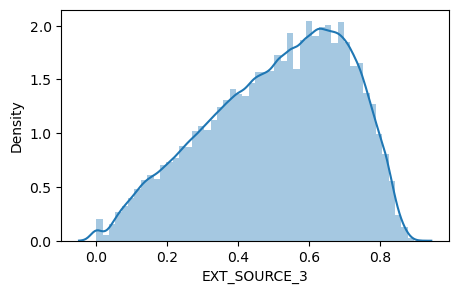

In [1148]:
plt.figure(figsize=[5,3])
df1.EXT_SOURCE_3.value_counts()
sns.distplot(df1.EXT_SOURCE_3)
plt.show()

In [473]:
print(df1.EXT_SOURCE_3.median())
print(df1.EXT_SOURCE_3.mean())

0.5352762504724826
0.5108529061799658


In [474]:
df1.EXT_SOURCE_3.skew()

-0.4093904596160267

In [ ]:
If this value is between:

-0.5 and 0.5, the distribution of the value is almost symmetrical(take mean)

-1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate.

If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.

In [475]:
# Filling the missing values with mean for the column EXT_SOURCE_3

df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.mean(),inplace= True)
df1.EXT_SOURCE_3.isnull().sum()

0

**All these are discrete values and can be replaced with mode(which is 0.0 in this case) as per the below observations**
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631


In [476]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()


AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [477]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [478]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [479]:
df1.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_YEAR', ylabel='Density'>

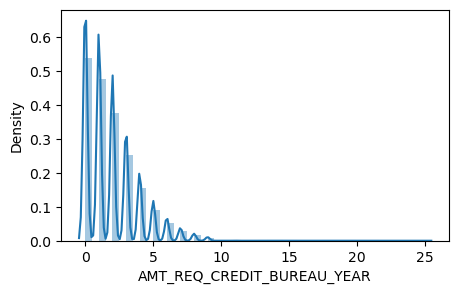

In [1135]:
plt.figure(figsize=[5,3])
df1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()
sns.distplot(df1.AMT_REQ_CREDIT_BUREAU_YEAR)

In [481]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [482]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace= True)

In [483]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace= True)
df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace= True)
df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace= True)
df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace= True)
df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace= True)


**All the above columns have discrete values and can be replaced with mode(which is 0.0 in this case) as per the observations**

In [484]:
df1.columns[df1.isnull().any()].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [136]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

# Standardising values

In [1149]:
df1.DAYS_BIRTH.describe()
df1.DAYS_REGISTRATION.describe()
df1.DAYS_EMPLOYED.describe()
df1.DAYS_ID_PUBLISH.describe()


count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

**The above columns DAYS_BIRTH,DAYS_REGISTRATION, DAYS_EMPLOYED,DAYS_ID_PUBLISH seem to have negative value, so better to convert  all these to abs values.Also convert them to years and rename the column.**
 

In [1150]:
df1.DAYS_BIRTH = df1.DAYS_BIRTH.abs()/365
df1.DAYS_REGISTRATION = df1.DAYS_REGISTRATION.abs()/365
df1.DAYS_EMPLOYED = df1.DAYS_EMPLOYED.abs()/365
df1.DAYS_ID_PUBLISH= df1.DAYS_ID_PUBLISH.abs()/365
df1.DAYS_LAST_PHONE_CHANGE= df1.DAYS_LAST_PHONE_CHANGE.abs()/365


In [1151]:
df1.rename(columns={"DAYS_BIRTH": "YEAR_BIRTH", "DAYS_REGISTRATION": "YEARS_REGISTRATION", "DAYS_EMPLOYED": "YEARS_EMPLOYED",
                                    "DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE":"YEARS_LAST_PHONE_CHANGE"},inplace=True)
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEAR_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_3

**BINNING YEAR_BIRTH AND AMT_INCOME_TOTAL**

In [1152]:
df1["AGE_GRP"]= pd.cut(df1.YEAR_BIRTH,bins=[15,25,35,45,55,65,75,85])
df1.AGE_GRP.value_counts()

AGE_GRP
(35, 45]    84274
(25, 35]    72302
(45, 55]    70077
(55, 65]    60596
(15, 25]    12159
(65, 75]     8103
(75, 85]        0
Name: count, dtype: int64

In [489]:
df1["TOTAL_INCOME"] =pd.qcut(df1.AMT_INCOME_TOTAL,q=[0,0.1,0.3,0.6,0.8,1],labels=["Verylow","low","Medium","High","Veryhigh"])
df1.TOTAL_INCOME.value_counts()


TOTAL_INCOME
Medium      84302
High        75513
low         67187
Veryhigh    47118
Verylow     33391
Name: count, dtype: int64

In [490]:
df1.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [491]:
df1.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

**CODE_GENDER seems to have 4 'XNA' values which can be filled with 'F' which is majority**

In [492]:
df1.CODE_GENDER= df1.CODE_GENDER.replace("XNA","F")

In [493]:
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

# OUTLIERS

**'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_LAST_PHONE_CHANGE' have outliers**

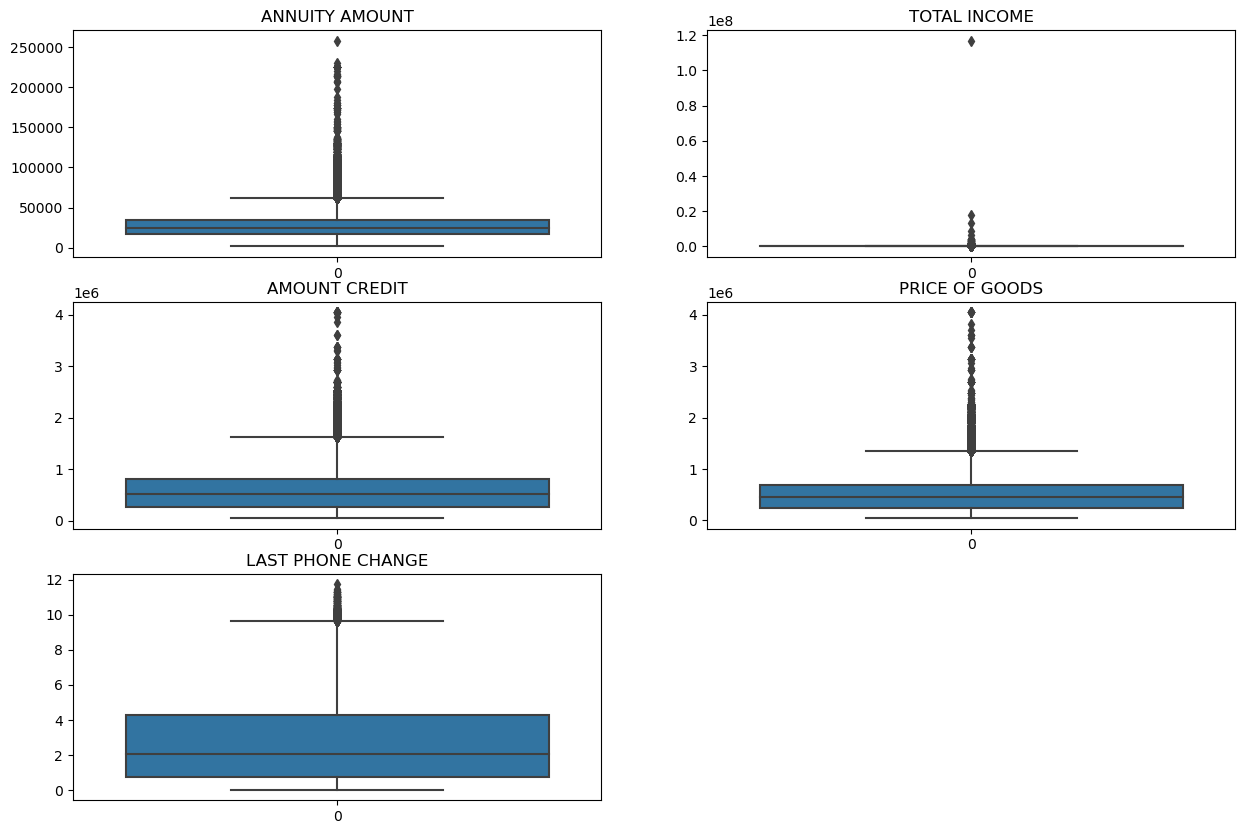

In [1155]:

plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
sns.boxplot(df1.AMT_ANNUITY)
plt.title("ANNUITY AMOUNT")
plt.subplot(3,2,2)
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.title("TOTAL INCOME")
plt.subplot(3,2,3)
sns.boxplot(df1.AMT_CREDIT)
plt.title("AMOUNT CREDIT")
plt.subplot(3,2,4)
sns.boxplot(df1.AMT_GOODS_PRICE)
plt.title("PRICE OF GOODS")
plt.subplot(3,2,5)
sns.boxplot(df1.YEARS_LAST_PHONE_CHANGE)
plt.title("LAST PHONE CHANGE")
plt.show()

**Few points from the above plots:**

**1.AMT_ANNUITY is having outliers having values above 60000, where as IQR lies between 16524 and 34596**               

**2.We can definetly observe outliers in AMT_INCOME_TOTAL and one of the value far above the maximun with value 120000000**

**3.For Amount creditedWhile 50 percent of data lies between 2.7 lakh to 8 lakh, the outliers are spread above 15 lakh and extends above 40 lakhs.**

**4.Price of good(AMT_GOODS_PRICE)for which the loan is given also show the same kind of behaviour like Amount credited.**

**5.days before application did client change phone lies between 1 and 4 years ,there are many outliers above 10 years.**


# IMBALANCE IN DATA

**TARGET VARIABLE**
Target variable 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y                       installments of the loan in our sample 
                0 - all other cases


In [496]:
df1.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [497]:
df1.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [498]:
282686/24825

11.387150050352467

**Out of 307511, 24825(8%)are having difficulting in repaying the loans while 282686(91.9 %) are able to repay the loan.
and the ratio is 11.38 % which is high.**


**We can plot a pie chart or barplot to visualize the TARGET variable**

# UNIVARIATE ANALYSIS

In [289]:
##TARGET VARIABLE PLOTS

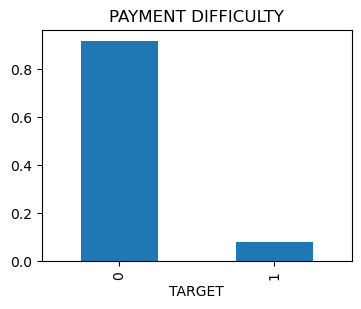

In [1158]:
plt.figure(figsize=[4,3])
df1.TARGET.value_counts(normalize=True).plot.bar()
plt.title("PAYMENT DIFFICULTY")
plt.xlabel("TARGET")
plt.show()

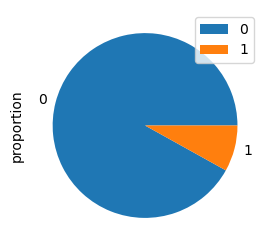

In [1159]:
plt.figure(figsize=[4,3])
df1.TARGET.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

**Univariate analysis on Categorical Nominal variables(BOTH TARGET 1 AND TARGET 0)**

Dividing the dataset into 2 based on TARGET variable to do univariate analysis on botHthe dataframes

df_def -TARGET =1(DEFAULTER)

df_ndef - TARGET=0(NON DEFAULTER)

In [1084]:
df_def= df1[df1["TARGET"]==1]
df_def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GRP,TOTAL_INCOME
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,3.106849,0.0,0.0,0.0,0.0,0.0,1.0,"(25, 35]",High
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,...,0.0,0.441096,0.0,0.0,0.0,0.0,2.0,2.0,"(45, 55]",low
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,...,0.0,2.945205,0.0,0.0,0.0,2.0,0.0,4.0,"(45, 55]",High
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,...,0.0,4.054795,0.0,0.0,0.0,0.0,0.0,2.0,"(35, 45]",Medium
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,...,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"(65, 75]",Verylow


In [1085]:
df_ndef= df1[df1["TARGET"]==0]
df_ndef.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GRP,TOTAL_INCOME
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,2.268493,0.0,0.0,0.0,0.0,0.0,0.0,"(45, 55]",Veryhigh
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,2.232877,0.0,0.0,0.0,0.0,0.0,0.0,"(45, 55]",Verylow
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,1.690411,0.0,0.0,0.0,0.0,0.0,0.0,"(45, 55]",Medium
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,3.030137,0.0,0.0,0.0,0.0,0.0,0.0,"(45, 55]",Medium
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",...,0.0,6.947945,0.0,0.0,0.0,0.0,1.0,1.0,"(45, 55]",low


In [501]:
catvar=df1.columns[df1.dtypes=='object'].tolist()
print(catvar)


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64


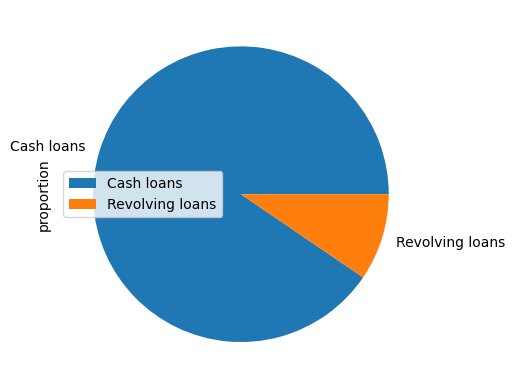

CODE_GENDER
F    65.835694
M    34.164306
Name: proportion, dtype: float64


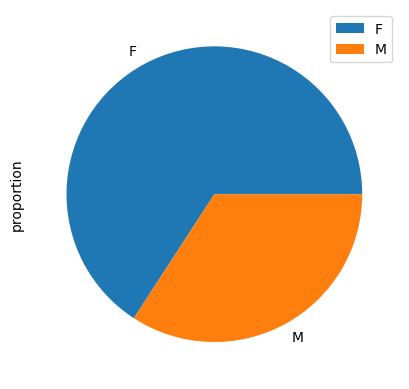

FLAG_OWN_CAR
N    65.989184
Y    34.010816
Name: proportion, dtype: float64


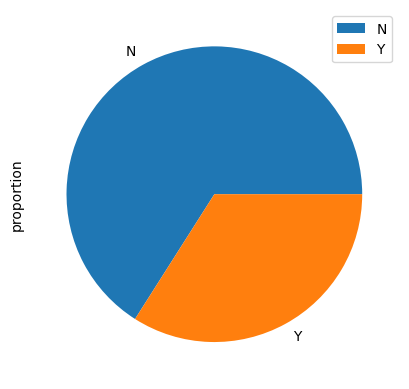

FLAG_OWN_REALTY
Y    69.367275
N    30.632725
Name: proportion, dtype: float64


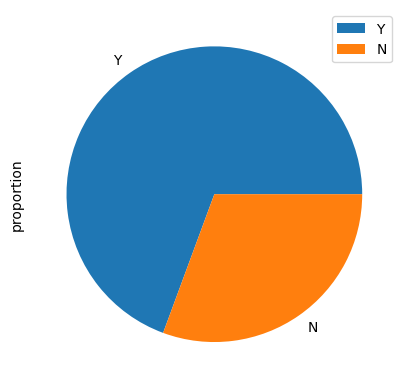

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64


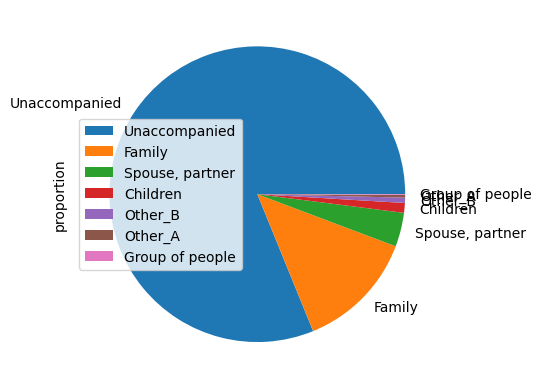

NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64


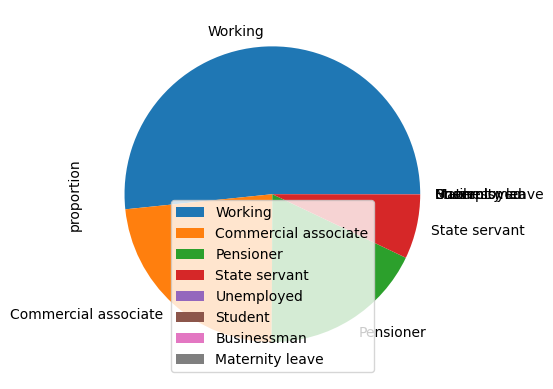

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64


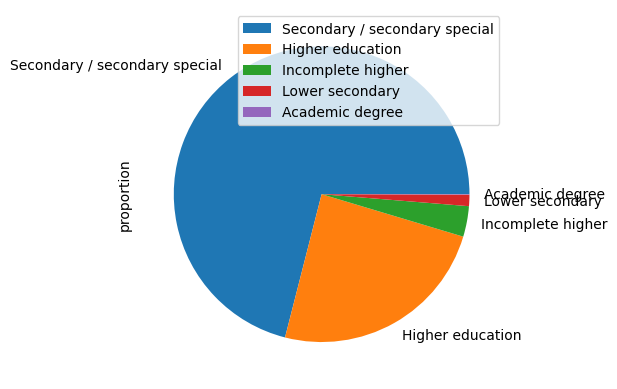

NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: proportion, dtype: float64


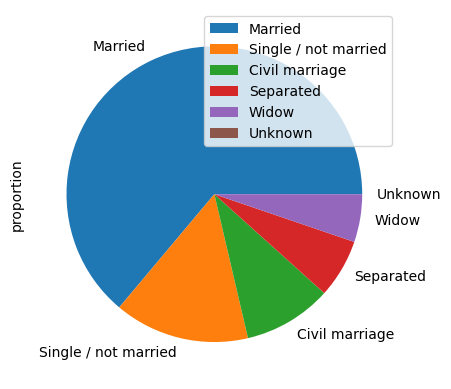

NAME_HOUSING_TYPE
House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: proportion, dtype: float64


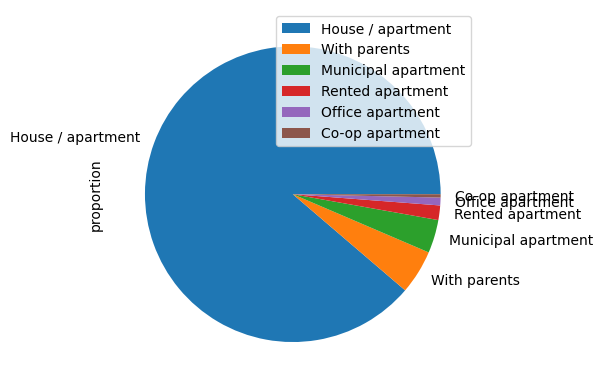

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64


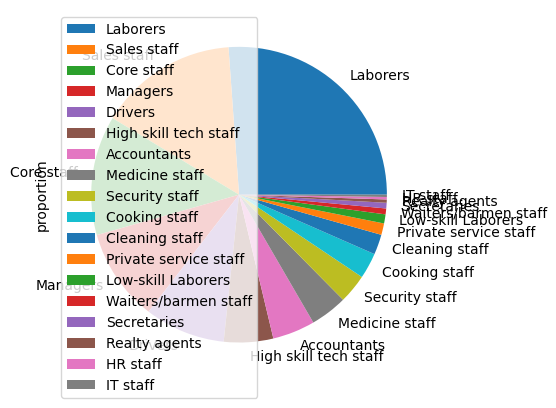

WEEKDAY_APPR_PROCESS_START
TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: proportion, dtype: float64


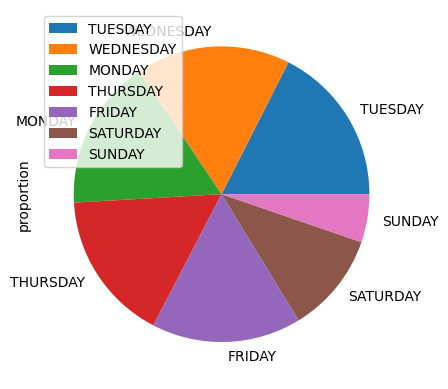

ORGANIZATION_TYPE
Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant

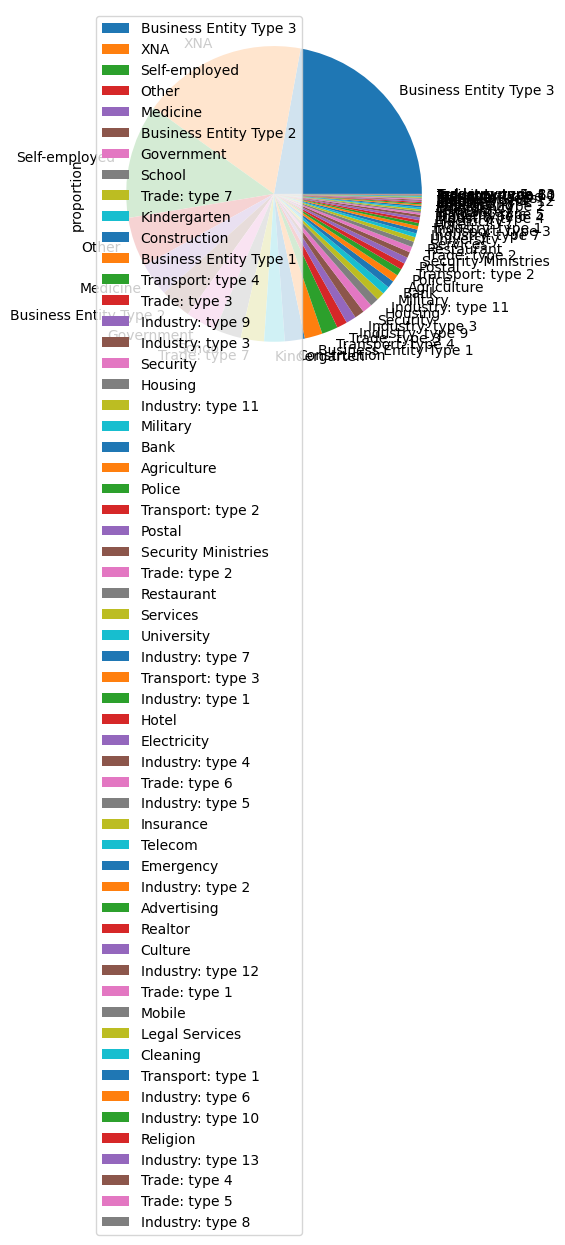

In [639]:
for i in catvar:
    print(df1[i].value_counts(normalize=True)*100)
    df1[i].value_counts(normalize=True).plot.pie()
    plt.legend()    
    plt.show()

**Plotting the categorical nominal variables listed above using bar chart for TARGET 1 and 0(in terms of total count and percentage**

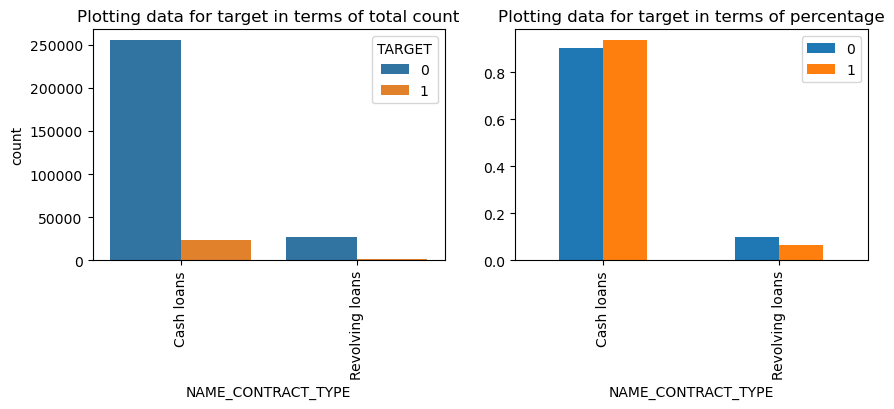

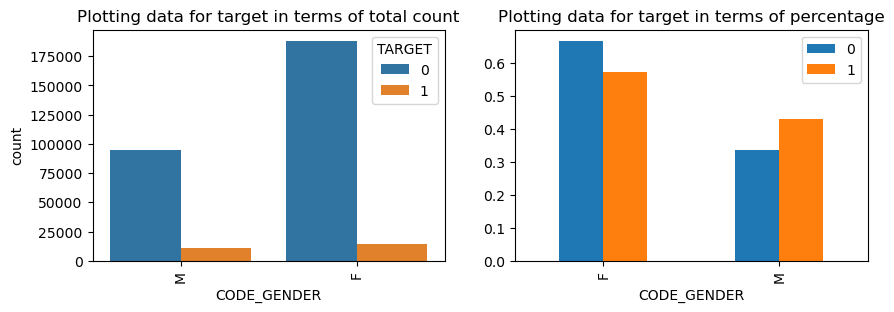

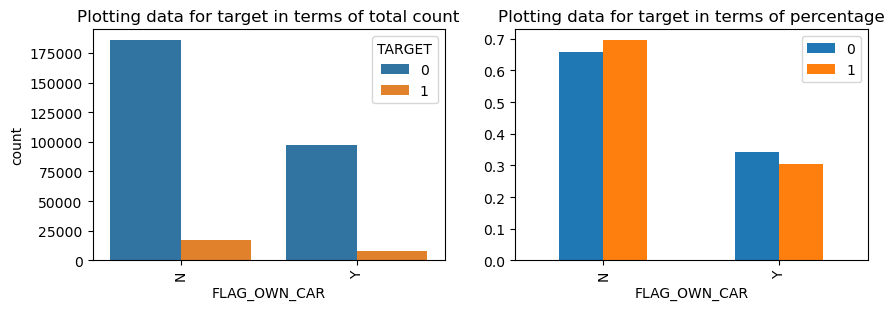

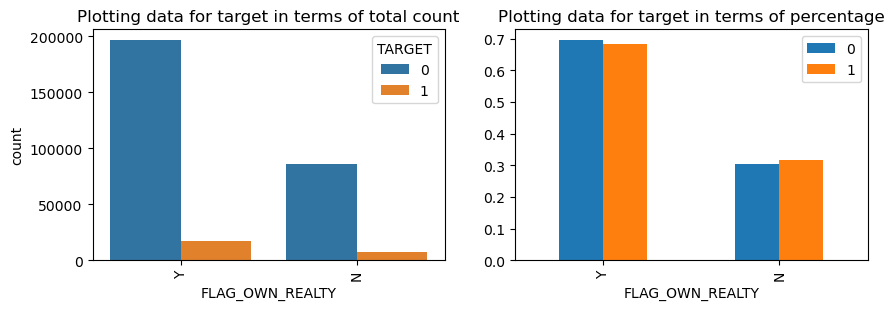

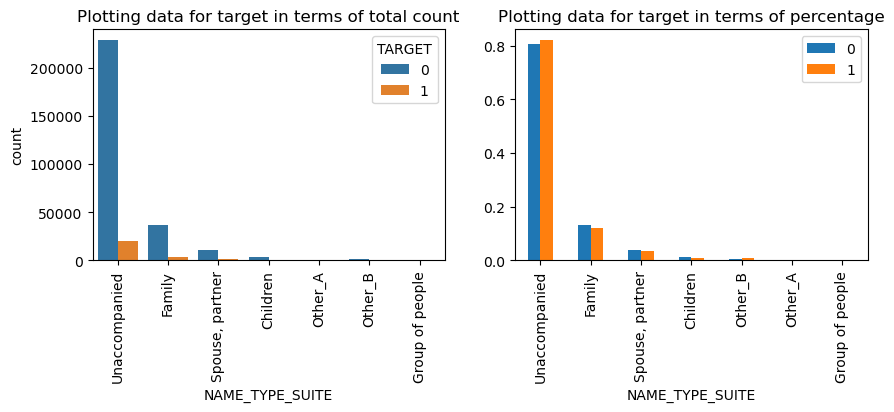

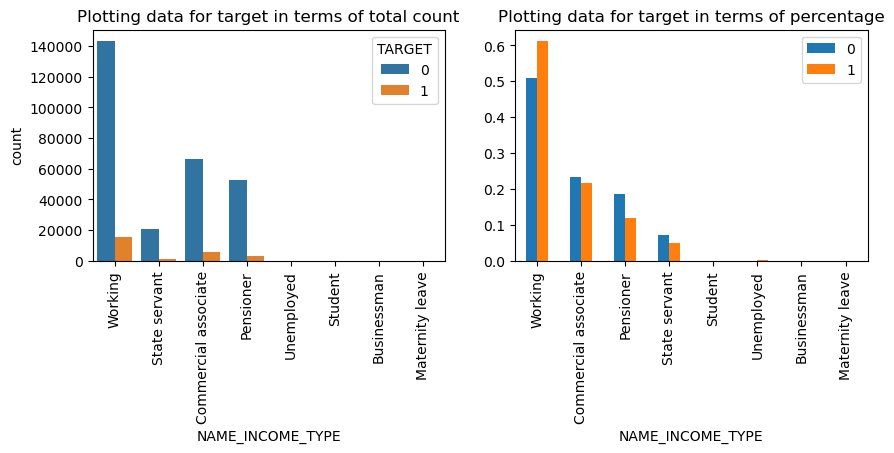

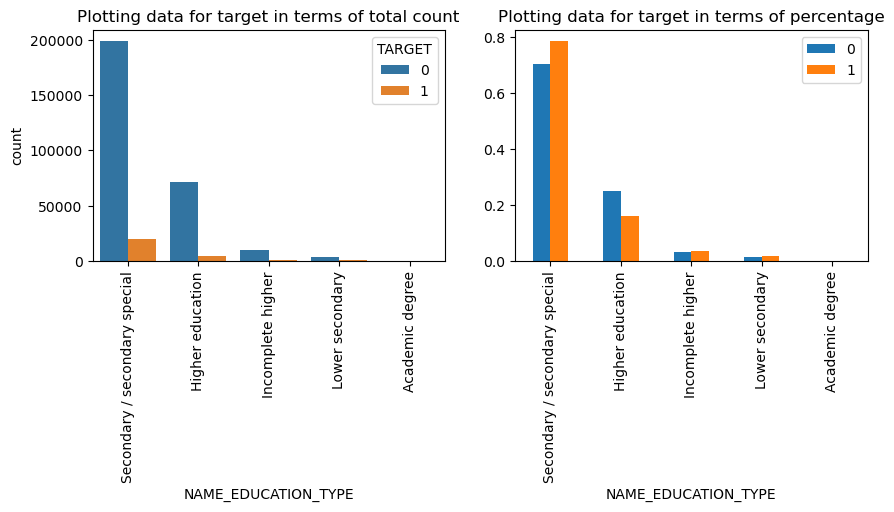

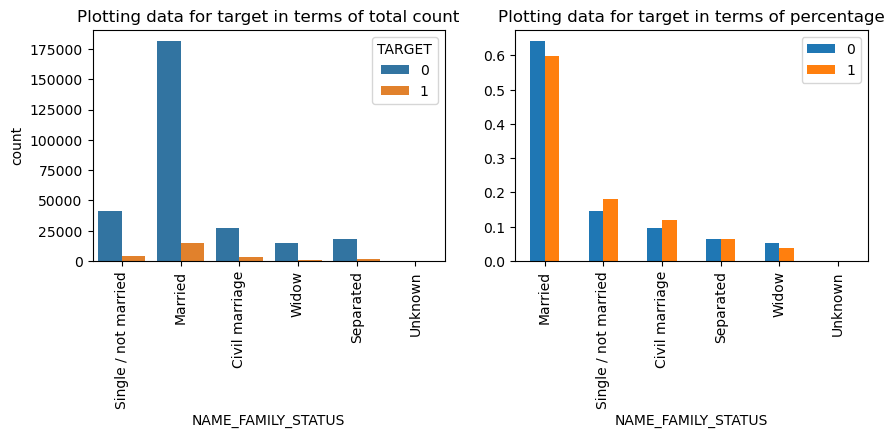

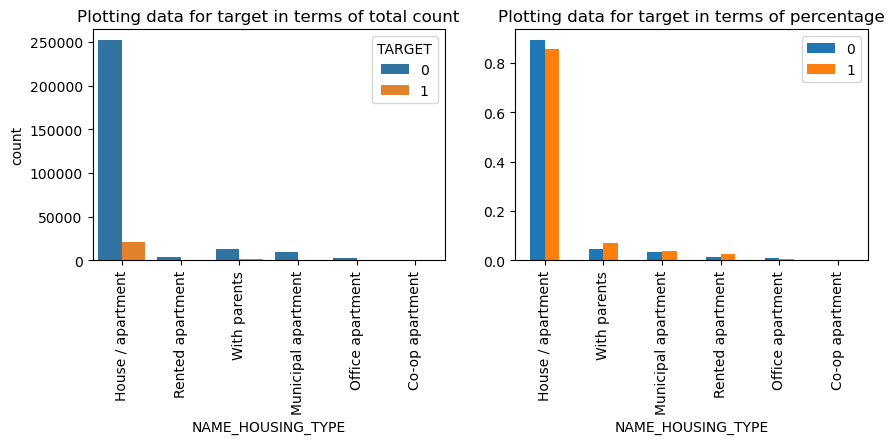

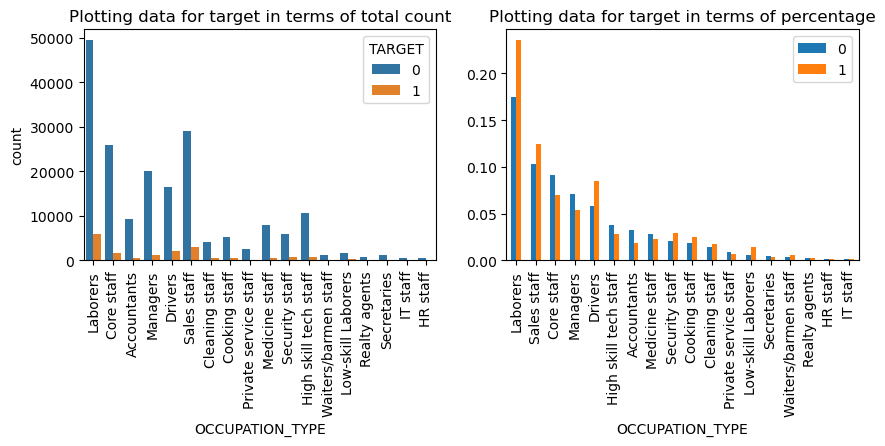

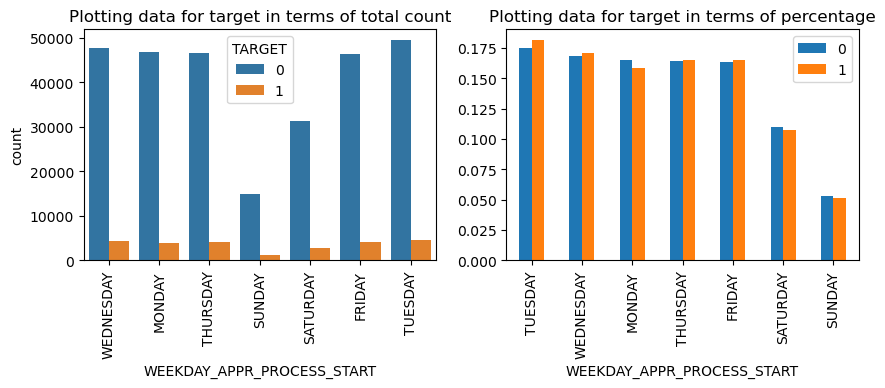

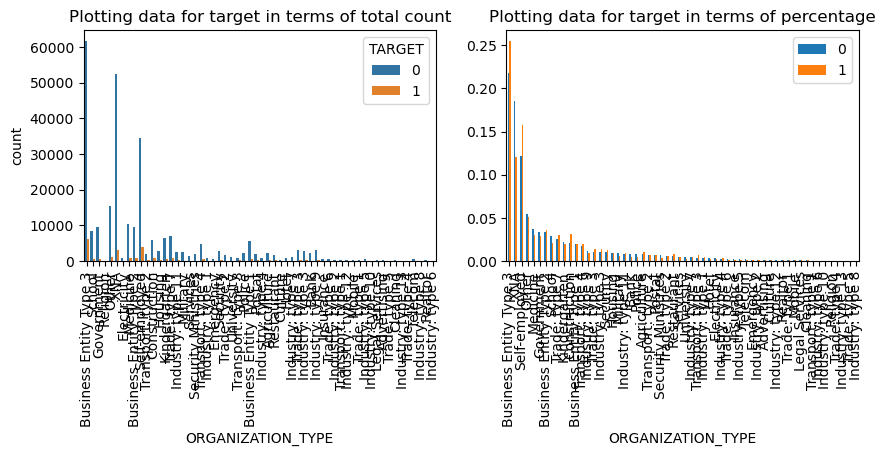

In [993]:
for i in catvar:
    plt.figure(figsize=[10,3])
    ax1 = plt.subplot(121)
    sns.countplot(x= i, hue = 'TARGET', data = df1, ax = ax1)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax2 = plt.subplot(122)
    df = pd.DataFrame()
    df['0']= ((df_ndef[i].value_counts())/len(df_ndef))
    df['1']= ((df_def[i].value_counts())/len(df_def))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() 

    plt.show()


**Few points from the above plots:**

**1.TARGET- 1 in 11 people are finding it difficult to repay the loan**

**2.NAME_CONTRACT_TYPE- Cash Loans are provided more than revolving loans ,about 90% are cash loans in both TARGET 1 and 0.**

**3.CODE_GENDER- Even though Female applicants are more in number, the male applicants seems to be more likely to default.**

**4.FLAG_OWN_CAR- Applicants who deosnt own car tend to default more.This is a Categorical ordered variable**

**5.FLAG_OWN_REALTY- Most of the people who applied loan have own house.Only 30% dont have own flat or house.This is a       Categorical ordered varaible**

**6.NAME_TYPE_SUITE-Most of the client who applied loan were unaccompanied.
.**

**7.NAME_INCOME_TYPE-Working class are the people who applies loan the most and there are significant percentage of defaulters
    present.Pensioners seem to be less defaulting considering their count in total application.**

**8.NAME_EDUCATION_TYPE-Almost 70% of loan applicants have secondary education in TARGET 1 and near to 80% for TARGET 0.**

**9.NAME_FAMILY_STATUS- Married people applies loan the most and there are significant number of defaulters too**

**10.NAME_HOUSING_TYPE- 88% have apartment/house while 4.8% live with their parents.**

**11.OCCUPATION_TYPE-Labourers and Sales staff are having more difficulty in repaying the loan.**
**12.WEEKDAY_APPR_PROCESS_START- Least no of people have applied for the Loan on sundays.**

**13.ORGANIZATION_TYPE- Business Entity type applied for Loan the most and there are significant number of defaulters too.**





**Univariate analysis on Categorical ordered variables**

In [374]:
numvar= df1.columns[df1.dtypes.isin(['int64','float64'])].tolist()
numvar

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

#From the above list If you see all the flag columns are like whether the client has provided mobile number or provided document1 to 21 etc
and We can dont need these columns for further analysis

In [1080]:
df1 = df1.drop(columns=df1.columns[df1.columns.str.contains('FLAG', regex=True)])

In [1081]:
df1.shape

(307511, 47)

 #FROM THE ABOVE LIST OF NUMERIC VARIABLES, THE BELOW FIELDS CAN BE CONSIDERD AS CATEGORICAL ORDERED VARIABLES AS THEY HAVE LESS TAHN 3 OR 4 DISCRETE VALUES:
 
  REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 

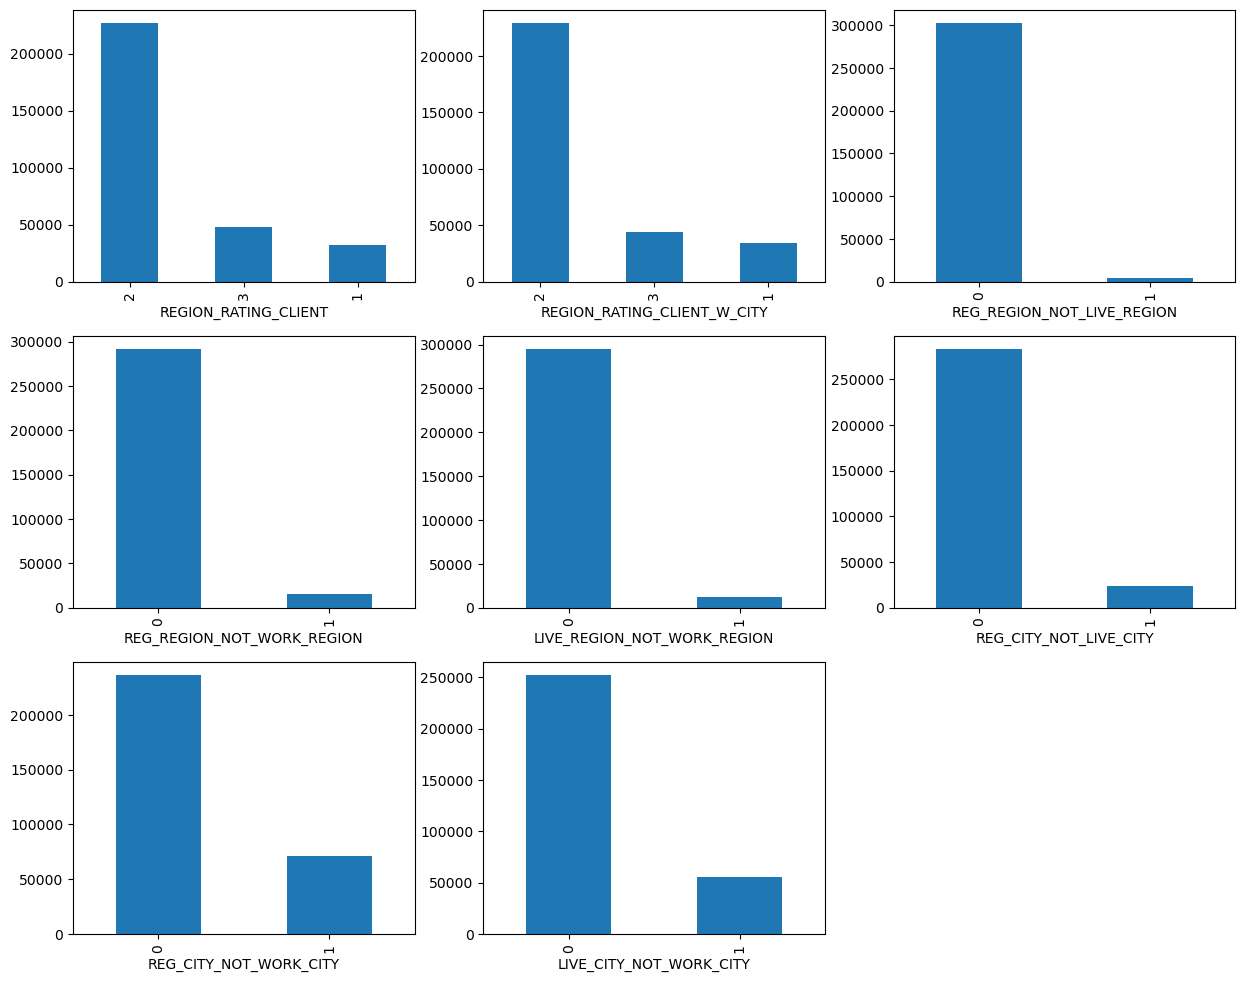

In [575]:
catvar1=['REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',]
x=3
y=3
z=1
plt.figure(figsize=[15,12])
for i in catvar1:
    plt.subplot(x,y,z)
    df1[i].value_counts().plot.bar()
    z=z+1   
plt.show()    
    

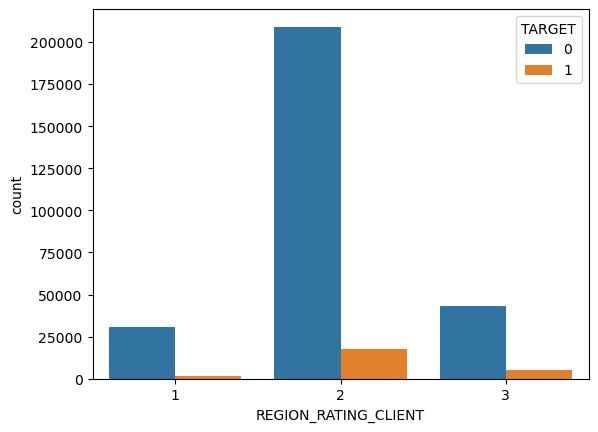

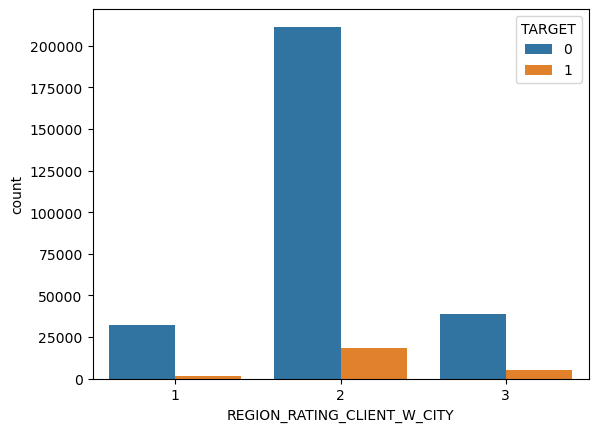

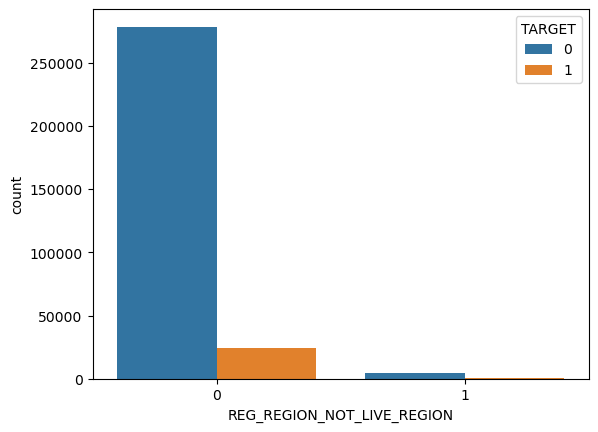

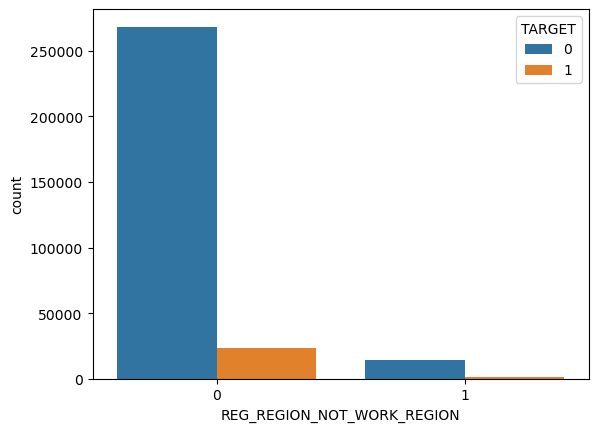

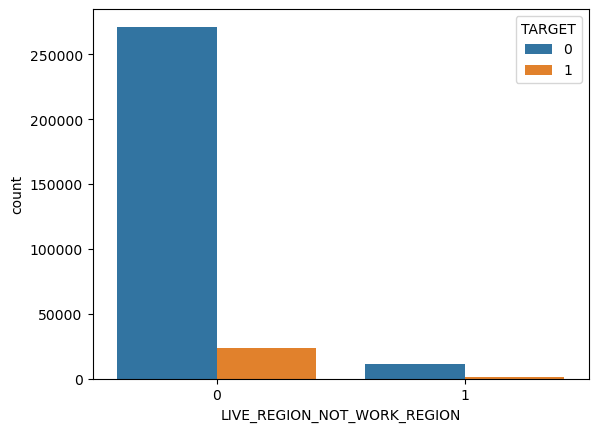

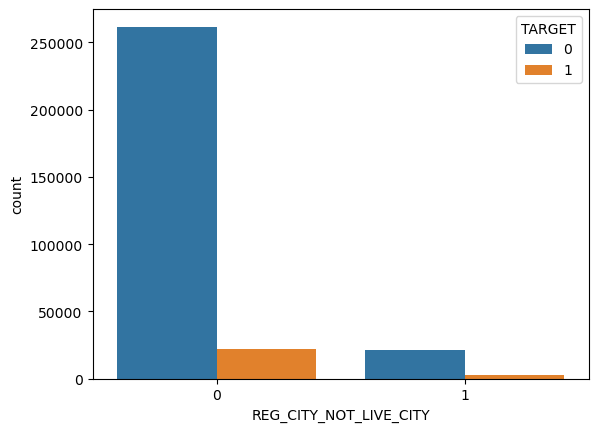

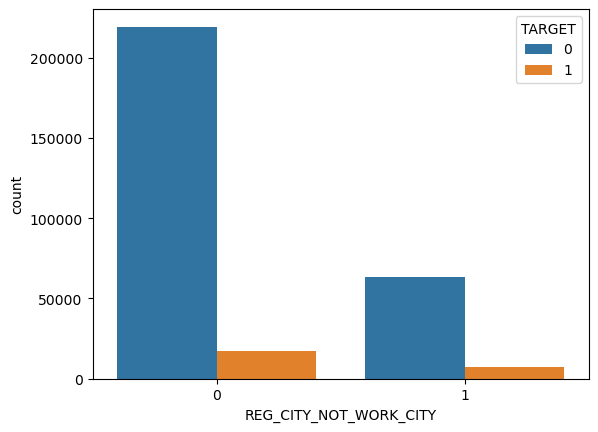

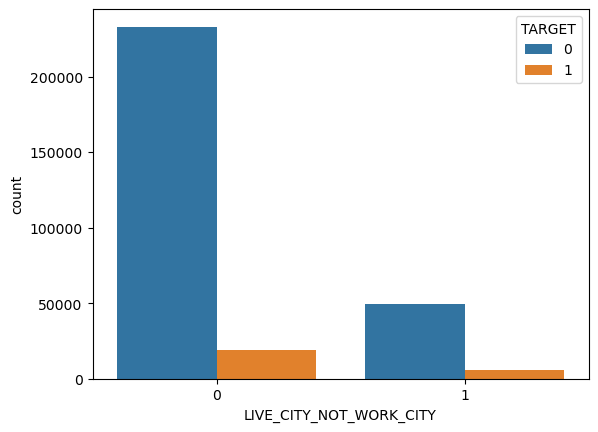

In [581]:
for i in catvar1:
    sns.countplot(data= df1,x=i,hue='TARGET')
    plt.show()
    
    

**Few points from the above plots fro the categorical ordered variables**

**1.REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY has majority rating as 2 for both TARGET 0 AND 1.**

**2.All other data have higher ratio of 0 which means permenant and contact address are same but can see a slightly high ratio for 1 for REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY which indicates there is difference between living city and work city.**

In [ ]:
**Univariate analysis on Numerical variables**

In [657]:
numerical=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEAR_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']


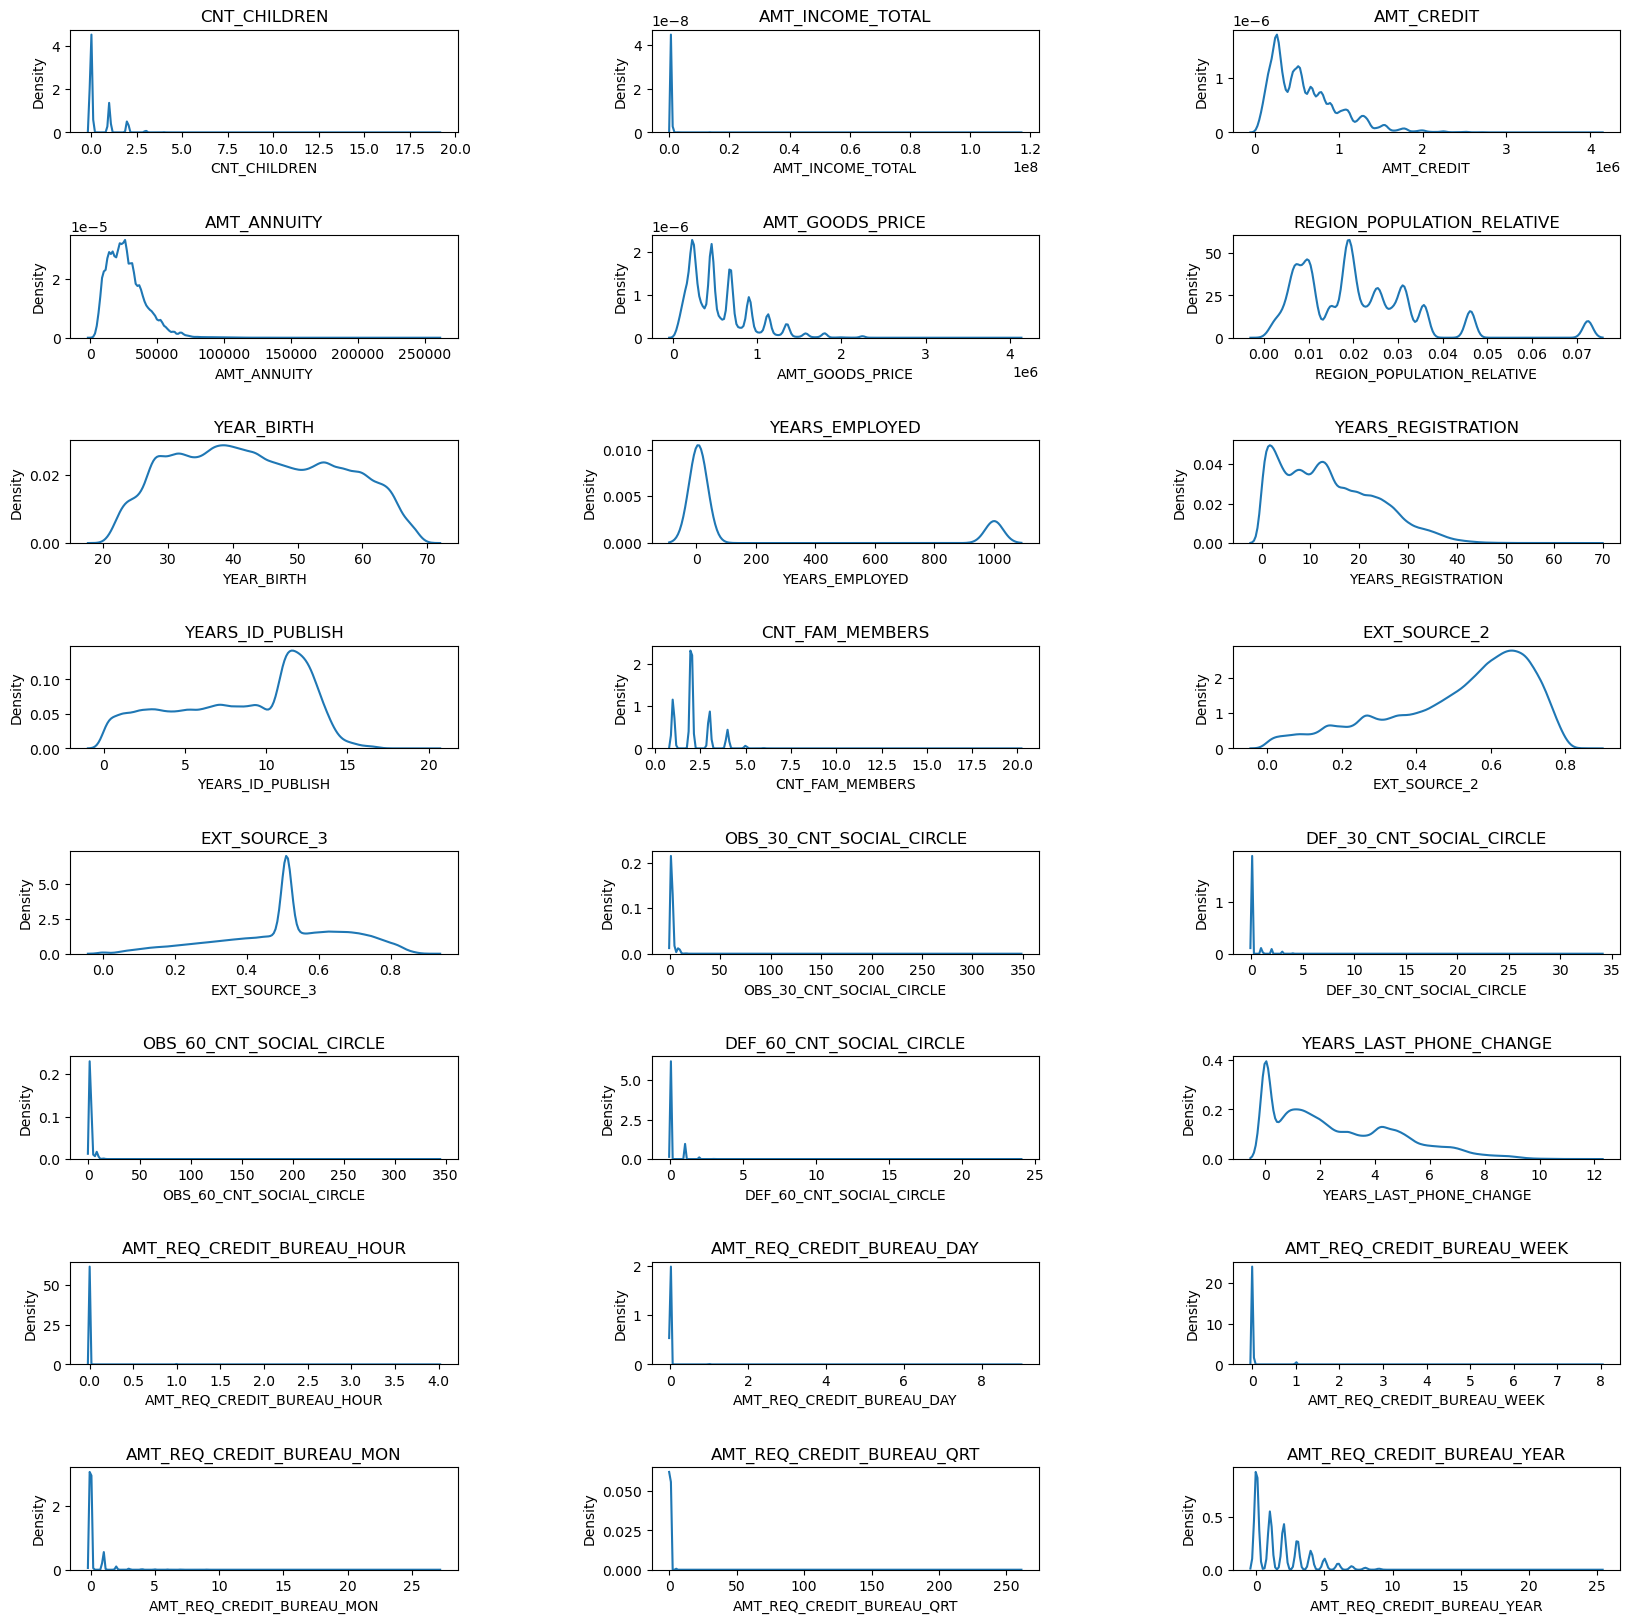

In [658]:
x=8
y=3
z=1
plt.figure(figsize=[20,20])
for i in numerical:
    plt.subplot(x,y,z)
    plt.subplots_adjust(wspace=0.5, hspace=1)
    plt.title(i)
    sns.distplot(df1[i],hist=False)
    z=z+1
fig.tight_layout()     
plt.show() 
    

#Taking significant variables from the above to see the distribution for default and non default

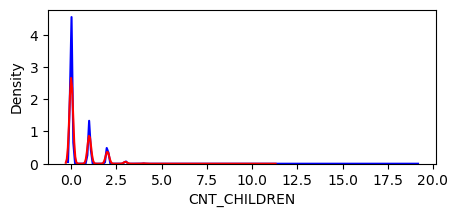

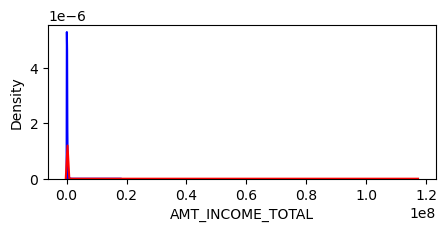

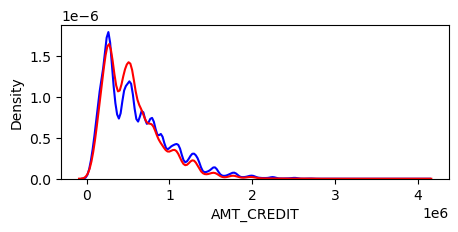

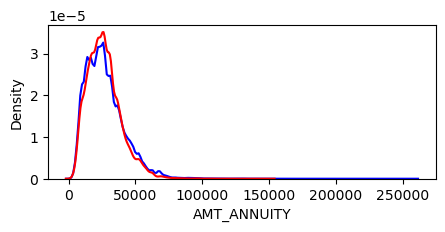

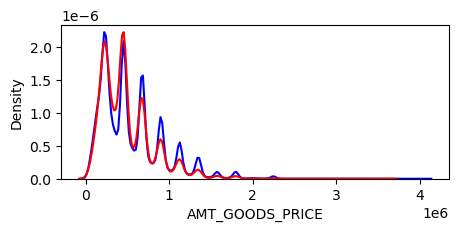

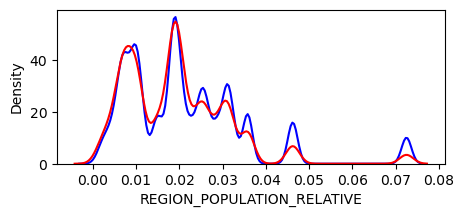

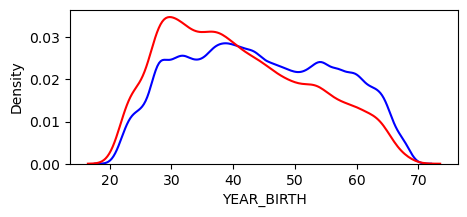

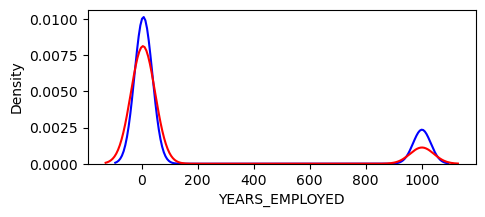

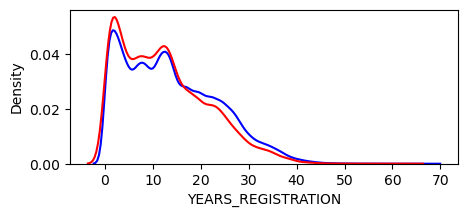

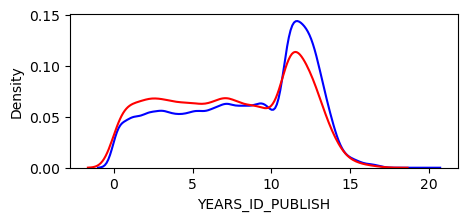

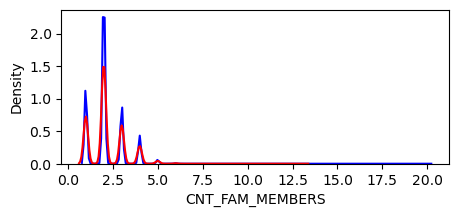

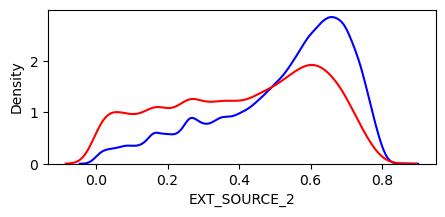

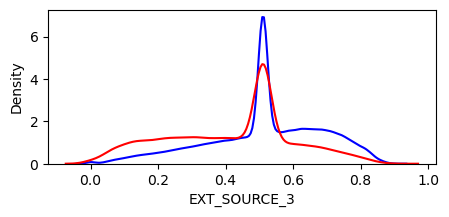

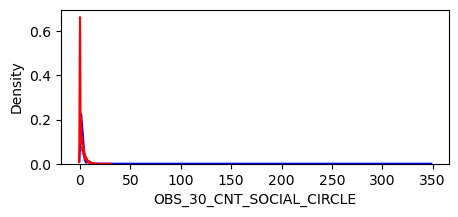

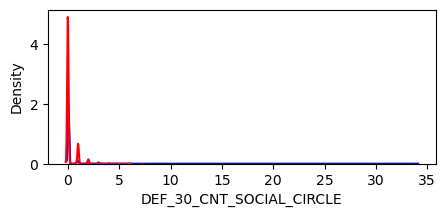

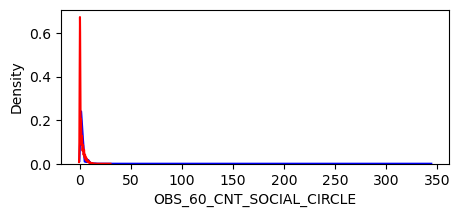

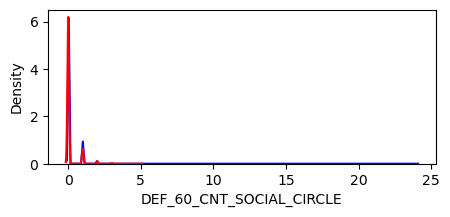

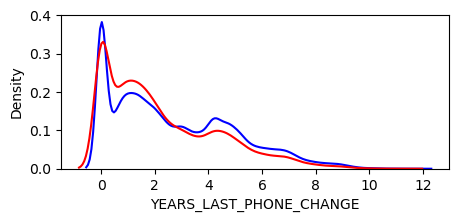

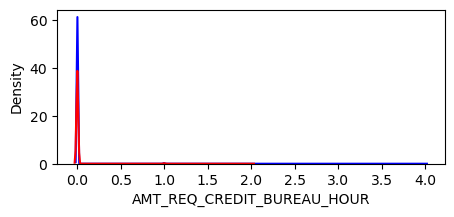

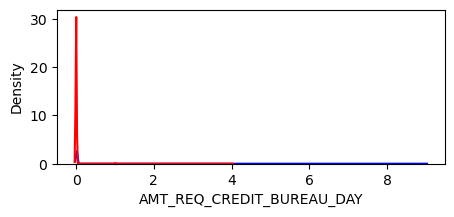

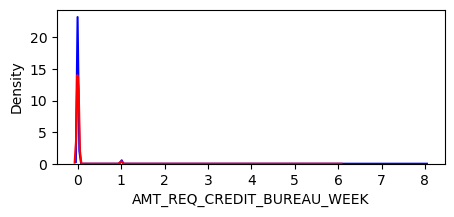

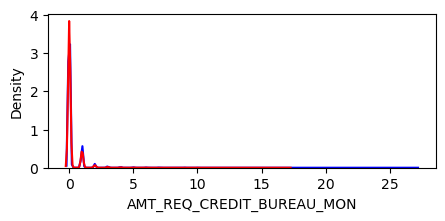

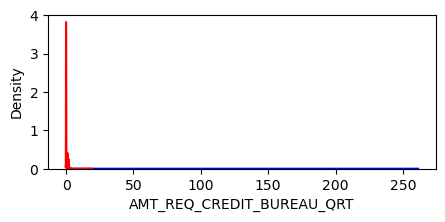

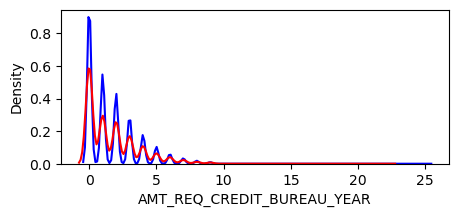

In [1161]:

for i in numerical:
    plt.figure(figsize=[5,2])
    sns.distplot(df_ndef[i],hist=False,color="Blue")
    sns.distplot(df_def[i],hist=False,color="Red")
    plt.show()   
 

**Few points from the above plots**

**1.CNT_CHILDREN-Both defaulters and non defaulters are more in number with 0 children but non defaulters seems to have more in number with 0 kids**

**2.AMT_CREDIT-Amount credited to TARGET 1 seems to be slightly less compared to TARGET 0 which is good.**

**3.YEAR_BIRTH- Defaulters seems to be around 30 years as density is more for TARGET 1.**

**4.EXT_SOURCE_2 & EXT_SOURCE_3- Normalized score from external data source is less for TARGET 0 which is expected.**

**5.AMT_REQ_CREDIT_BUREAU_YEAR- Number of enquiries to Credit Bureau about the client one day year seems to be less for TARGET 1.**




**Analysing AGE_GRP and TOTAL_INCOME for TARGET 1 and 0.** 

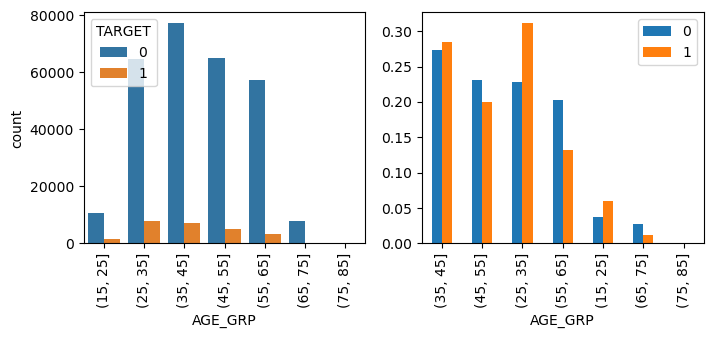

In [1002]:
plt.figure(figsize=[8,3])

ax1=plt.subplot(1,2,1)
sns.countplot(data= df1,x='AGE_GRP',hue='TARGET')
plt.xticks(rotation=90)

ax2=plt.subplot(1,2,2)
df=pd.DataFrame()
df['0']= (df_ndef["AGE_GRP"].value_counts()/len(df_ndef))
df['1']= (df_def["AGE_GRP"].value_counts()/len(df_def))
df.plot.bar(ax=ax2)

fig.tight_layout() 

plt.show()

**observation: Defaulters seems to be more within age group 25-35 and 35-45.**



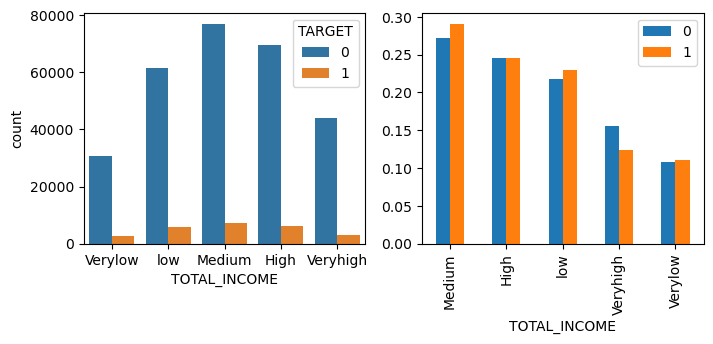

In [1004]:
plt.figure(figsize=[8,3])

ax1=plt.subplot(1,2,1)
sns.countplot(data= df1,x='TOTAL_INCOME',hue='TARGET')

ax2=plt.subplot(1,2,2)
df=pd.DataFrame()
df['0']= (df_ndef["TOTAL_INCOME"].value_counts()/len(df_ndef))
df['1']= (df_def["TOTAL_INCOME"].value_counts()/len(df_def))
df.plot.bar(ax=ax2)

fig.tight_layout() 

plt.show()

**observation:Clients with Medium salary seems to be defaulting more than other income groups.**
    

# BIVARIATE  and MULTIVARIATE ANALYSIS

**TOTAL_INCOME & AMT_CREDIT**

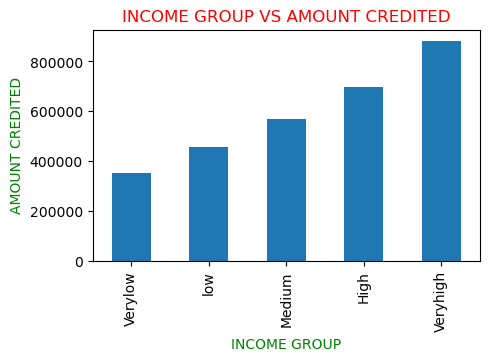

In [1006]:
plt.figure(figsize=[5,3])
df1.groupby("TOTAL_INCOME")["AMT_CREDIT"].mean().plot.bar()
plt.xlabel("INCOME GROUP",color='Green')
plt.ylabel("AMOUNT CREDITED",color='Green')
plt.title("INCOME GROUP VS AMOUNT CREDITED",fontsize=12,color='Red')
plt.show()

**observations: We can observe that Amount credited is high for the Veryhigh income group.we have already observed that Medium income people are 
more in number for defaulting,but this should also be considered as the amount credited is veryhigh and small number of defaulting 
can cause loss to the company.**


**AMT_ANNUITY and AMT_CREDIT**

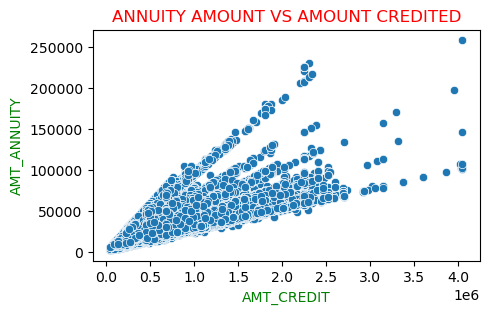

In [1008]:
plt.figure(figsize=[5,3])
sns.scatterplot(data=df1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.xlabel("AMT_CREDIT",color='Green')
plt.ylabel("AMT_ANNUITY",color='Green')
plt.title("ANNUITY AMOUNT VS AMOUNT CREDITED",fontsize=12,color='Red')
plt.show()

**Annuity amount increases with Amount credited which is understandable**

**PAIRPLOT FOR SOME IMPORT NUMERICAL VARIABLES(with hue as TARGET variable)**

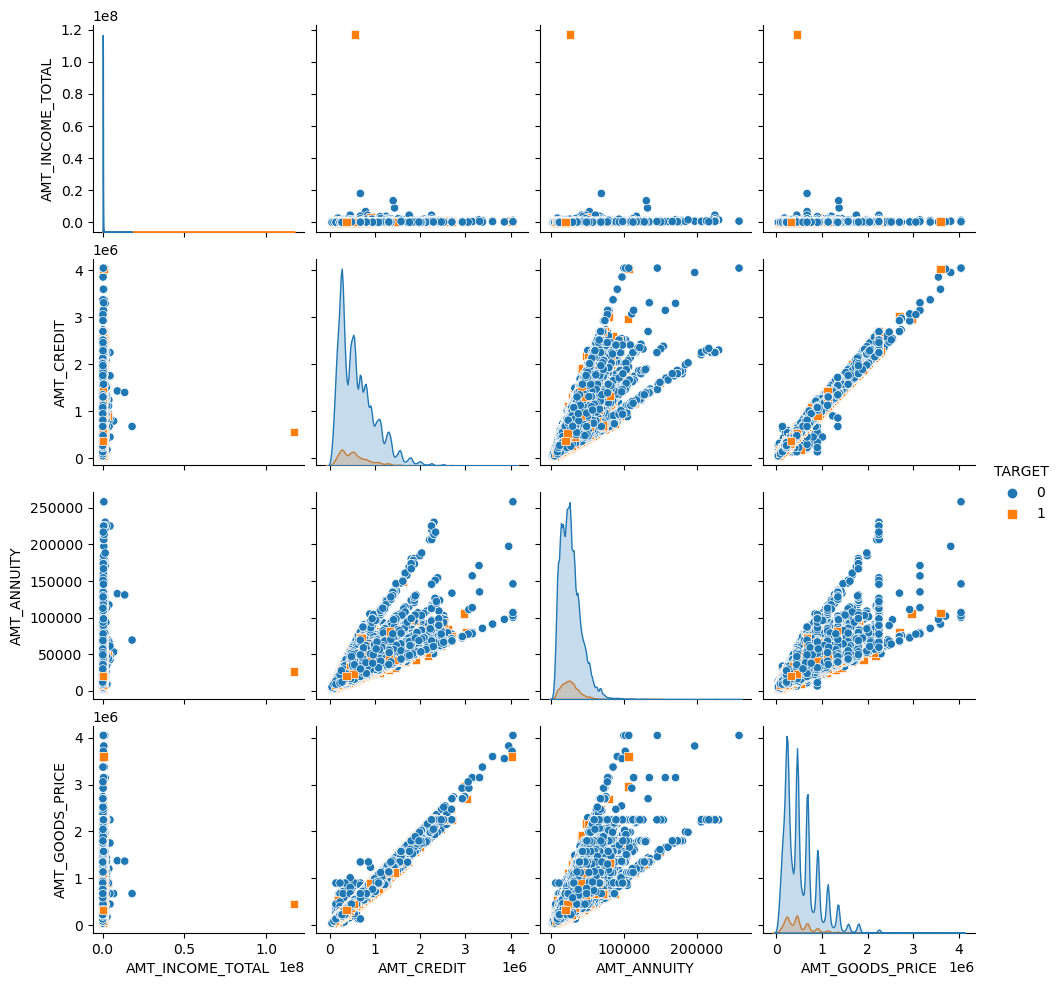

In [880]:
sns.pairplot(data=df1,vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'],hue="TARGET",markers=['o','s'])


**Few important points from the above scatter plots**

**AMT_CREDIT and AMT_GOODS_PRICE have good correlation.**

**AMT_ANNUITY also increases with AMT_CREDIT.**

**AMT_GOODS_PRICE and AMT_ANNUITY also have positive correlation.**


Correlation heatmap for the above variables for TARGET 1(With payment difficulty)

In [ ]:
sns.heatmap(df_def[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']],annot=True,cmap='YlGnBu')

Correlation heatmap for the above variables for TARGET 0(Without payment difficulty)

<Axes: >

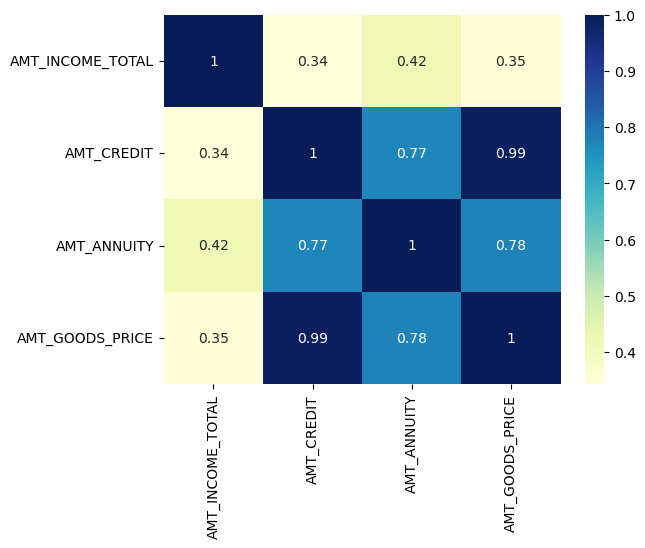

In [883]:
sns.heatmap(df_ndef[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot=True,cmap='YlGnBu')

**Few observations.**

**AMT_CREDIT & AMT_GOODS_PRICE has very high correlation.**

**AMT_GOODS_PRICE & AMT_ANNUITY also have good correlation**

**AMT_INCOME_TOTAL seems to have less correlation with all other varaiables.**

**AMT_ANNUITY and AMT_CREDIT have a positive correlation of .77.**




# CORRELATION

**Correlation for TARGET = 1**

In [1086]:
corr_1 = df_def.corr(numeric_only= True).abs()


In [1087]:
corr_1= corr_1.unstack().sort_values()


In [1088]:
corr_1 = corr_1.dropna()

In [1089]:
corr_1 = corr_1[corr_1 != 1.0]

In [1090]:
corr_1.sort_values(ascending=False).head(30)

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868994
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778540
AMT_ANNUITY                  AMT_G

**The below are top 10 correlations for defaulter**

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269

AMT_GOODS_PRICE              AMT_CREDIT                     0.983103

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637

CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484

DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885

REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540

AMT_GOODS_PRICE              AMT_ANNUITY                    0.752699

AMT_CREDIT                   AMT_ANNUITY                    0.752195

YEARS_EMPLOYED               YEAR_BIRTH                     0.582185

**Correlation for TARGET = 0**

In [1092]:
corr_0 = df_ndef.corr(numeric_only= True).abs()


In [1093]:
corr_0= corr_0.unstack().sort_values()

In [1094]:
corr_0 = corr_0.dropna()

In [1096]:
corr_0 = corr_0[corr_0 != 1.0]

In [1098]:
corr_0.sort_values(ascending=False).head(30)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE              AMT_CREDIT                     0.987250
AMT_CREDIT                   AMT_GOODS_PRICE                0.987250
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859332
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830381
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
AMT_GOODS_PRICE              AMT_A

**The below are top 10 correlations for  non-defaulter**

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508

AMT_GOODS_PRICE              AMT_CREDIT                     0.987250

REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149

CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861

DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332

REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830381

AMT_GOODS_PRICE              AMT_ANNUITY                    0.776686

AMT_CREDIT                   AMT_ANNUITY                    0.771309

YEARS_EMPLOYED               YEAR_BIRTH                     0.626114

# PREVIOUS APPLICATION 

**Reading the previous application**

In [667]:
df2= pd.read_csv("previous_application.csv")

In [668]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [669]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# HANDLING THE MISSING VALUES

In [683]:
miss_prev= (df2.isnull().sum()/len(df2) *100).sort_values(ascending=False)
miss_prev

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

**dropping the columns with null values>50**

In [700]:
df2.columns[df2.isnull().any()].tolist()

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

**Dropping NAME_TYPE_SUITE AND NFLAG_INSURED_ON_APPROVAL as it doesnt seem significant for our Analysis**


In [701]:
df2= df2.drop(columns=["NAME_TYPE_SUITE","NFLAG_INSURED_ON_APPROVAL"])

In [745]:
df2.columns[df2.isnull().any()].tolist()

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [746]:
df2[df2.AMT_CREDIT.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,NaN,FRIDAY,10,Y,...,20,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN


There is only null row for AMT_CREDIT and we can drop it if needed but that is not needed here

In [759]:
df2.PRODUCT_COMBINATION.value_counts(dropna=False)


PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
NaN                                  346
Name: count, dtype: int64

PRODUCT_COMBINATION has 346 nan values,it can replaced with mode value Cash, but seems like it is not mandatory field and the number of missing percentage is just .02%.

DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION' 

In [767]:
df2[['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NAME_CONTRACT_STATUS']].head(10)

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS
0,365243.0,-42.0,300.0,-42.0,-37.0,Approved
1,365243.0,-134.0,916.0,365243.0,365243.0,Approved
2,365243.0,-271.0,59.0,365243.0,365243.0,Approved
3,365243.0,-482.0,-152.0,-182.0,-177.0,Approved
4,NaN,NaN,NaN,NaN,NaN,Refused
5,365243.0,-654.0,-144.0,-144.0,-137.0,Approved
6,NaN,NaN,NaN,NaN,NaN,Canceled
7,NaN,NaN,NaN,NaN,NaN,Canceled
8,NaN,NaN,NaN,NaN,NaN,Canceled
9,NaN,NaN,NaN,NaN,NaN,Canceled


In [776]:
(df2["NAME_CONTRACT_STATUS"]!='Approved').sum()/len(df2)

0.37925259876878054

**It seems that the above DAYS variables are having null values for Application that are either cancelled or Refused which seems correct
so no need to impute or delete them.**

In [817]:
df2.NAME_PAYMENT_TYPE.value_counts(normalize=True)

NAME_PAYMENT_TYPE
Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: proportion, dtype: float64

In [818]:
df2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

NAME_CASH_LOAN_PURPOSE
XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                 

In [819]:
df2.CODE_REJECT_REASON.value_counts(normalize=True)

CODE_REJECT_REASON
XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: proportion, dtype: float64

In [821]:
df2.NAME_GOODS_CATEGORY.value_counts(normalize=True)*100

NAME_GOODS_CATEGORY
XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0

**In the above columns, we can see a lot of invalid values like 'XNA','XNP'etc. We can replace it with mode as it is categorical data 
but as the no of rows are more, it is not advisable.We can fill it with Nan and consider them as null values.**

In [1101]:
df2.loc[df2["NAME_PAYMENT_TYPE"]=='XNA',"NAME_PAYMENT_TYPE"]=np.NaN
df2.loc[df2["NAME_CASH_LOAN_PURPOSE"]=='XNA',"NAME_CASH_LOAN_PURPOSE"]=np.NaN
df2.loc[df2["NAME_CASH_LOAN_PURPOSE"]=='XAP',"NAME_CASH_LOAN_PURPOSE"]=np.NaN
df2.loc[df2["CODE_REJECT_REASON"]=='XNA',"CODE_REJECT_REASON"]=np.NaN
df2.loc[df2["CODE_REJECT_REASON"]=='XAP',"CODE_REJECT_REASON"]=np.NaN
df2.loc[df2["NAME_GOODS_CATEGORY"]=='XNA',"NAME_GOODS_CATEGORY"]=np.NaN


# Standardising

DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION' are having negative values and also can be converted to year and rename the columns as we did for application datframe

In [ ]:
df2.DAYS_FIRST_DRAWING = (df2.DAYS_FIRST_DRAWING/365).abs()
df2.DAYS_FIRST_DUE = (df2.DAYS_FIRST_DUE/365).abs()
df2.DAYS_LAST_DUE_1ST_VERSION= (df2.DAYS_LAST_DUE_1ST_VERSION/365).abs()
df2.DAYS_LAST_DUE= (df2.DAYS_LAST_DUE/365).abs()
df2.DAYS_TERMINATION= (df2.DAYS_TERMINATION/365).abs()

In [822]:
df2.rename(columns={'DAYS_FIRST_DRAWING':'YEARS_FIRST_DRAWING','DAYS_FIRST_DUE':'YEARS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION':'YEARS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE':'YEARS_LAST_DUE','DAYS_TERMINATION':'YEARS_TERMINATION'},inplace=True)

In [823]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'YEARS_FIRST_DRAWING', 'YEARS_FIRST_DUE', 'YEARS_LAST_DUE_1ST_VERSION',
       'YEARS_LAST_DUE', 'YEARS_TERMINATION'],
      dtype='object')

# Outliers

We will check for outliers in the columns AMT_ANNUITY,AMT_APPLICATION ,AMT_CREDIT,AMT_GOODS_PRICE                

In [904]:
outlier=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']
for i in outlier:
    print(i)
    print(df2[i].describe())
    print( "\n" )
    print('*'*30)

AMT_ANNUITY
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


******************************
AMT_APPLICATION
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


******************************
AMT_CREDIT
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


******************************
AMT_GOODS_PRICE
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

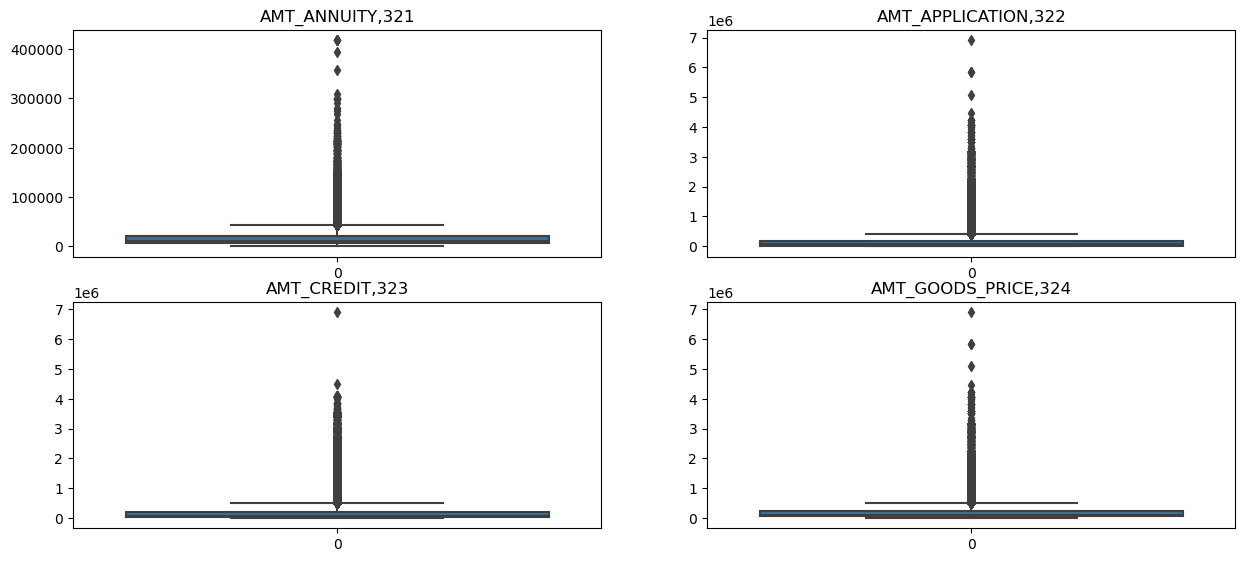

In [892]:
outlier=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']
x=3
y=2
z=1
plt.figure(figsize=[15,10])
for i in outlier:
    plt.subplot(x,y,z)
    sns.boxplot(df2[i])
    plt.title('{},{}{}{}'.format(i,x,y,z))
    z=z+1
plt.show()    

**we definetly have so many outliers for the above fields but we are not handling this as per instructions.**

**AMT_ANNUITY-50 % of data lies between 6000 to 20000 but there are many outliers above 50000 and reaches a maximum of 400000.**

**AMT_APPLICATION- while the median of Application amount is appr 70000,the highest outlier value is 7000000.**

**AMT_CREDIT- The outlier cluster is mainly above 50000 and 400000.**



NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64


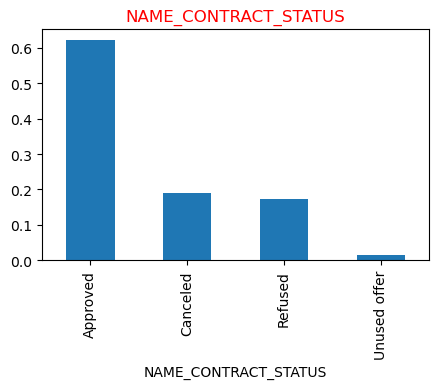

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64


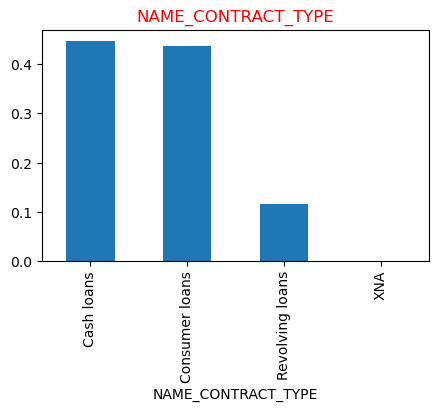

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: count, dtype: int64


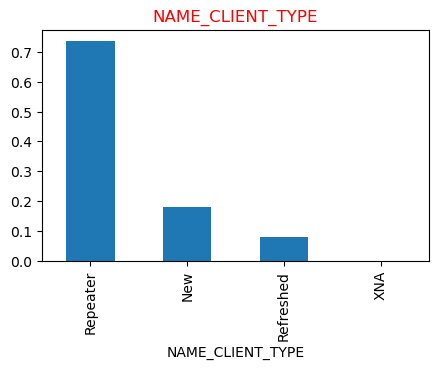

In [1162]:

catvar2=['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE']
for i in catvar2:
    plt.figure(figsize=[5,3])
    print(df2[i].value_counts())
    df2[i].value_counts(normalize=True).plot.bar()
    plt.title(i,fontsize=12,fontweight=5,color='Red')
    plt.show()

**Few points to be noted**

**NAME_CONTRACT_STATUS-We can observe that more than 60 % of previous applications are approved and Cancelled are just 18.9 %,where as refused 17.4% and unused conributes least percentage of 1.5.**

**NAME_CONTRACT_TYPE-44 and 43 % of loans are Cash loans and Consumer loans.**

**NAME_CLIENT_TYPE-More than 70% of clients are repeaters who have applied loans earlier.**

# Merging the previous and current application files

In [1102]:
df3= df1.merge(df2,left_on='SK_ID_CURR',right_on='SK_ID_CURR', how='inner') 
                                         


In [1103]:
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_FIRST_DRAWING,YEARS_FIRST_DUE,YEARS_LAST_DUE_1ST_VERSION,YEARS_LAST_DUE,YEARS_TERMINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,500,Auto technology,24.0,low_normal,POS other with interest,1000.665753,1.547945,0.342466,0.068493,0.046575
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,-1,XNA,12.0,low_normal,Cash X-Sell: low,1000.665753,1.961644,1.057534,1.468493,1.443836
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1400,Furniture,6.0,middle,POS industry with interest,1000.665753,2.183562,1.772603,1.772603,1.750685
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,200,Consumer electronics,12.0,middle,POS household with interest,1000.665753,6.328767,5.424658,5.424658,5.413699
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,30,Connectivity,4.0,middle,POS mobile without interest,1000.665753,2.147945,1.901370,1.983562,1.956164


# ANALYSIS ON MERGED DATA

**Splitting the merged data for TARGET 1 and TARGET 0**

In [1107]:
mdf_ndef = df3[df3["TARGET"]==0]
mdf_ndef.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_FIRST_DRAWING,YEARS_FIRST_DUE,YEARS_LAST_DUE_1ST_VERSION,YEARS_LAST_DUE,YEARS_TERMINATION
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,-1,XNA,12.0,low_normal,Cash X-Sell: low,1000.665753,1.961644,1.057534,1.468493,1.443836
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1400,Furniture,6.0,middle,POS industry with interest,1000.665753,2.183562,1.772603,1.772603,1.750685
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,200,Consumer electronics,12.0,middle,POS household with interest,1000.665753,6.328767,5.424658,5.424658,5.413699
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,30,Connectivity,4.0,middle,POS mobile without interest,1000.665753,2.147945,1.901370,1.983562,1.956164
5,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,-1,XNA,48.0,low_normal,Cash X-Sell: low,1000.665753,0.413699,3.449315,0.413699,0.391781


In [1108]:
mdf_def = df3[df3["TARGET"]==1]
mdf_def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_FIRST_DRAWING,YEARS_FIRST_DUE,YEARS_LAST_DUE_1ST_VERSION,YEARS_LAST_DUE,YEARS_TERMINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,500,Auto technology,24.0,low_normal,POS other with interest,1000.665753,1.547945,0.342466,0.068493,0.046575
161,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,...,-1,XNA,0.0,XNA,Card X-Sell,1000.665753,1000.665753,1000.665753,1000.665753,1000.665753
162,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,...,-1,XNA,24.0,high,Cash X-Sell: high,1000.665753,3.936986,2.046575,3.197260,3.186301
163,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,...,-1,XNA,36.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN
164,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,...,27,Connectivity,10.0,low_normal,POS mobile with interest,1000.665753,7.126027,6.386301,6.386301,6.372603


In [1120]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    df1[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((df_ndef[col].value_counts())/len(df_ndef))
    df['1']= ((df_def[col].value_counts())/len(df_ndef))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of percentage')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=mdf_ndef, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=mdf_def, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1')



    fig.tight_layout()

    plt.show()
    

**CODE_GENDER & NAME_CONTRACT_STATUS**

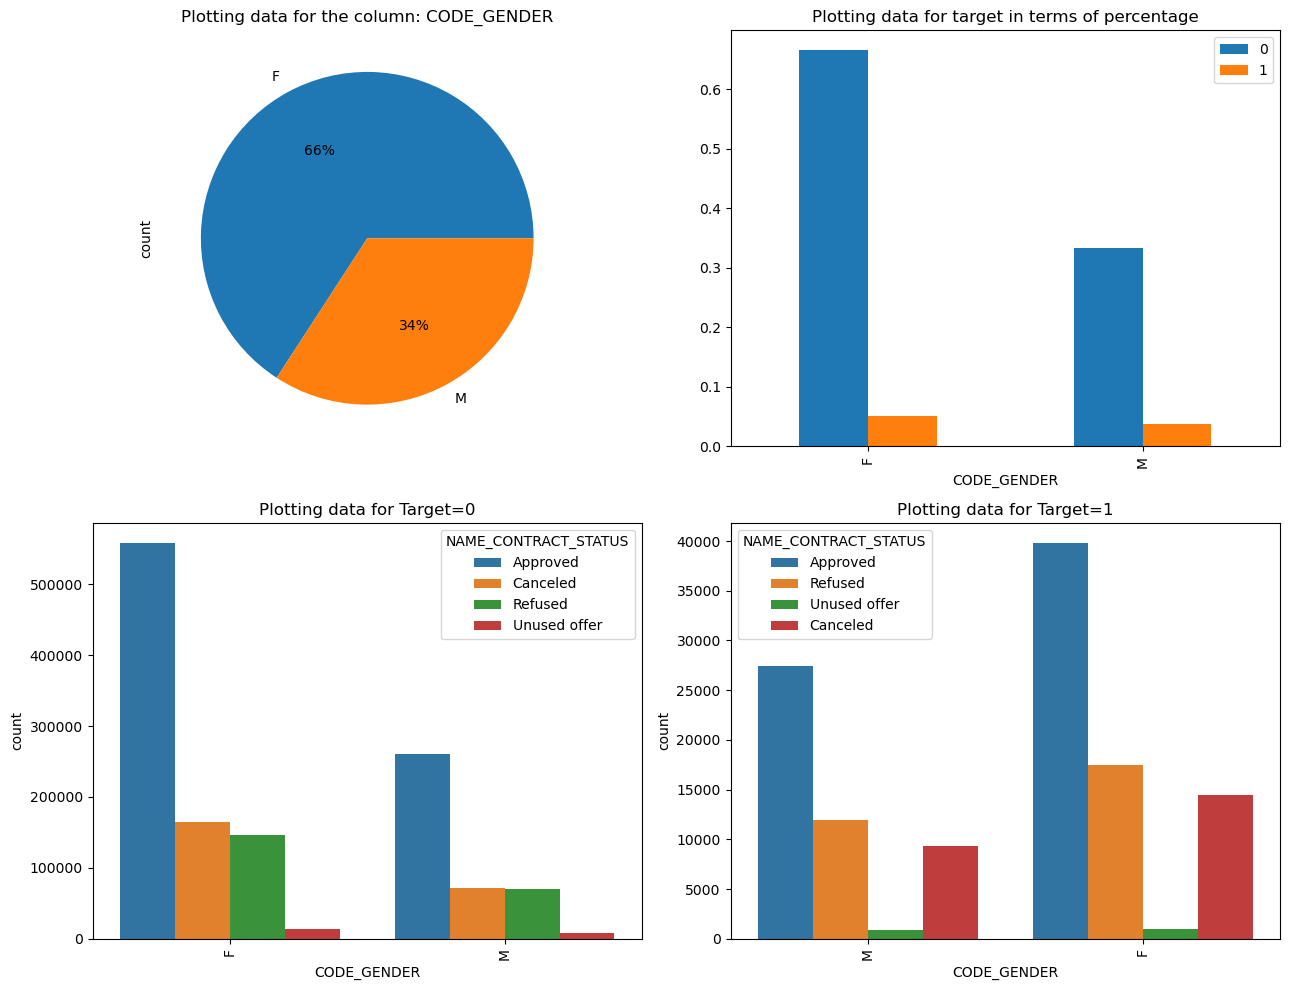

In [1122]:
plotting("CODE_GENDER","NAME_CONTRACT_STATUS")

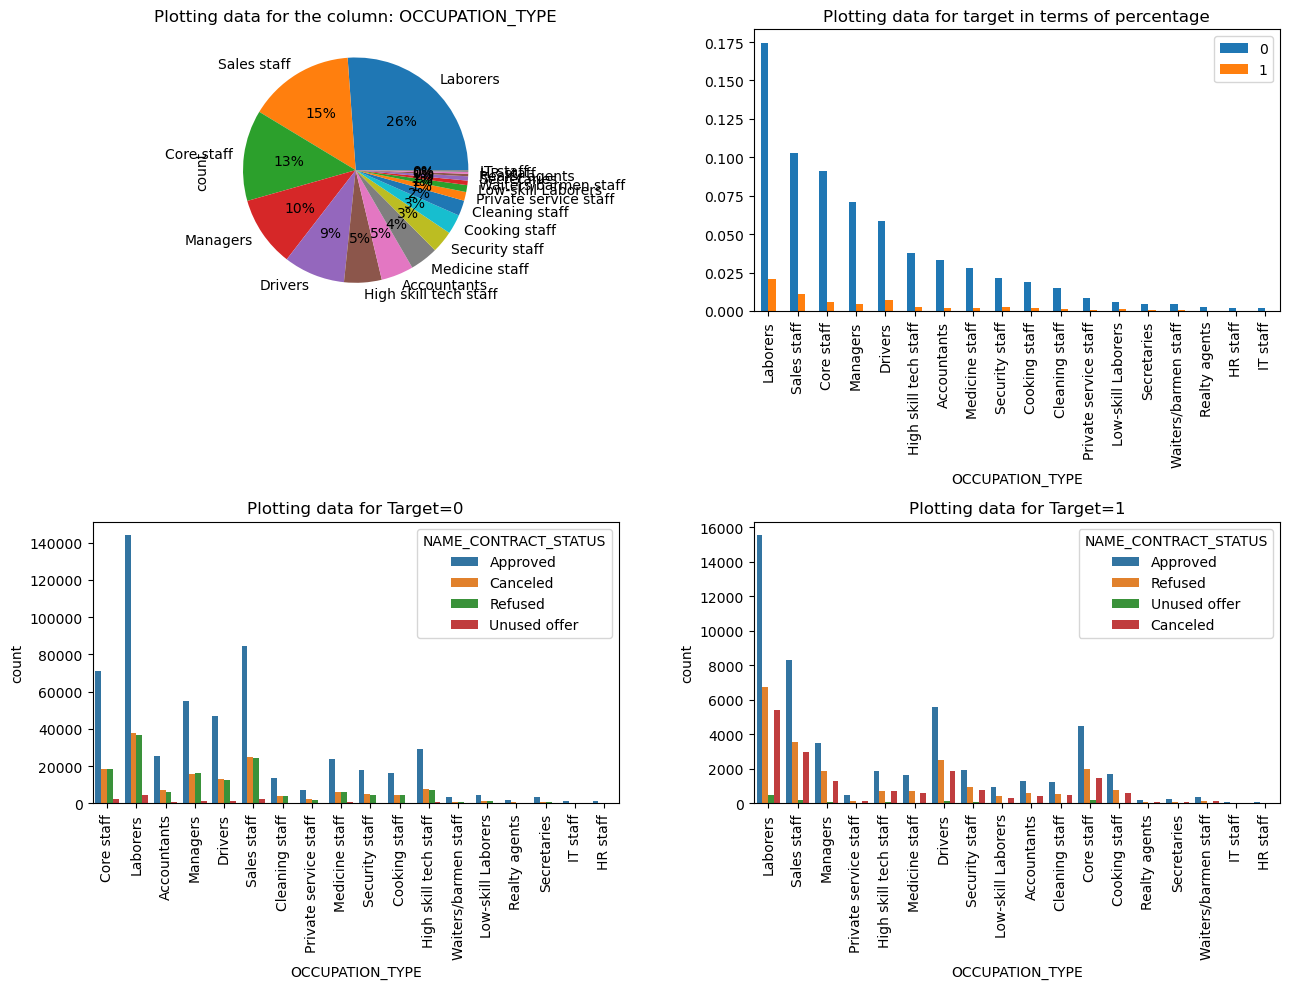

In [1121]:
plotting("OCCUPATION_TYPE","NAME_CONTRACT_STATUS")

**NAME_EDUCATION_TYPE & NAME_CONTRACT_STATUS**

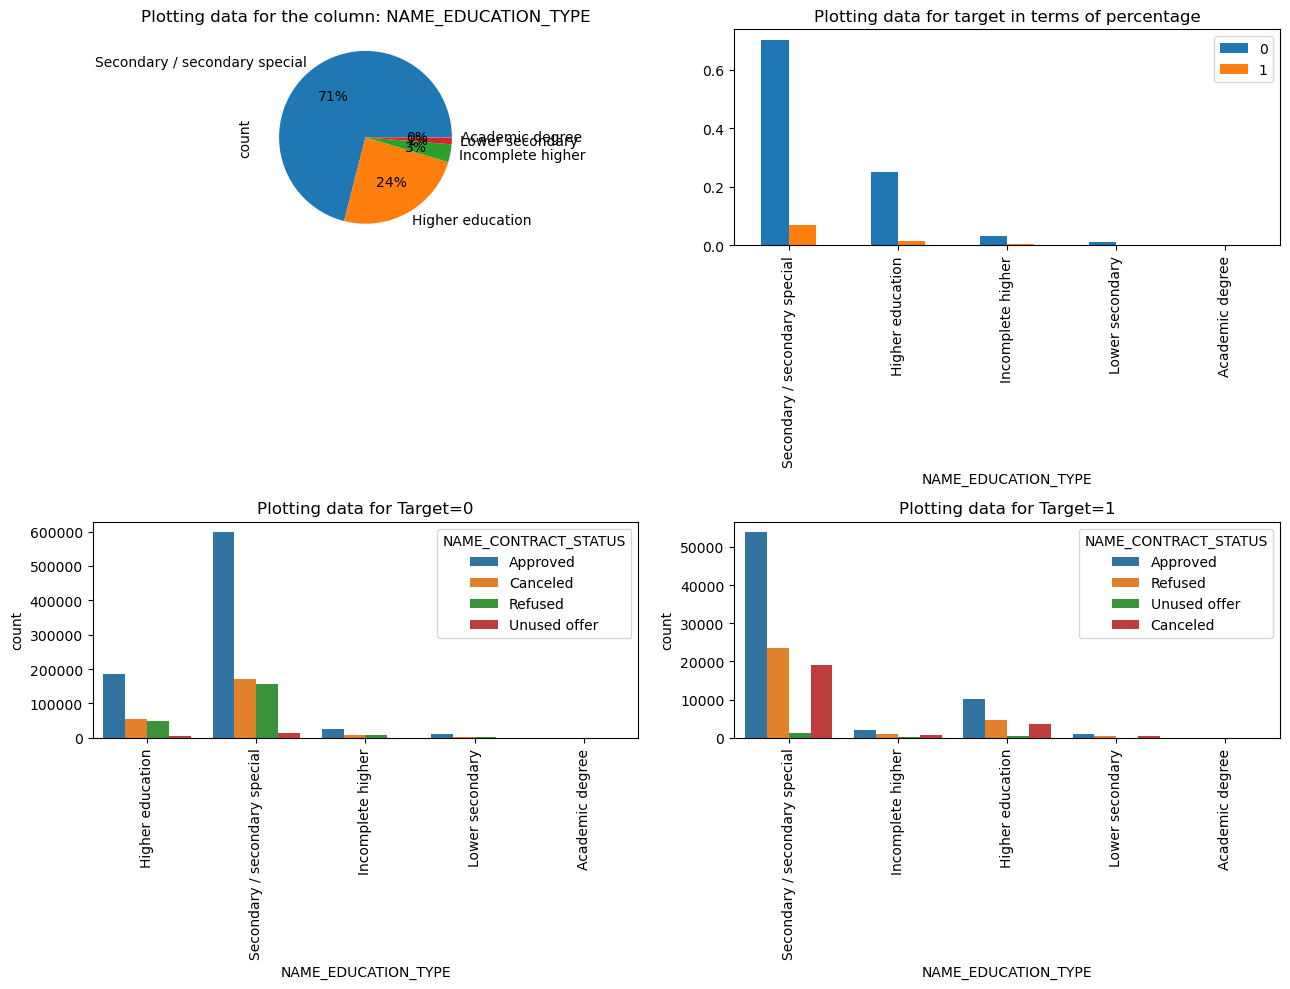

In [1123]:
plotting("NAME_EDUCATION_TYPE","NAME_CONTRACT_STATUS")

**NAME_INCOME_TYPE & NAME_CONTRACT_STATUS**

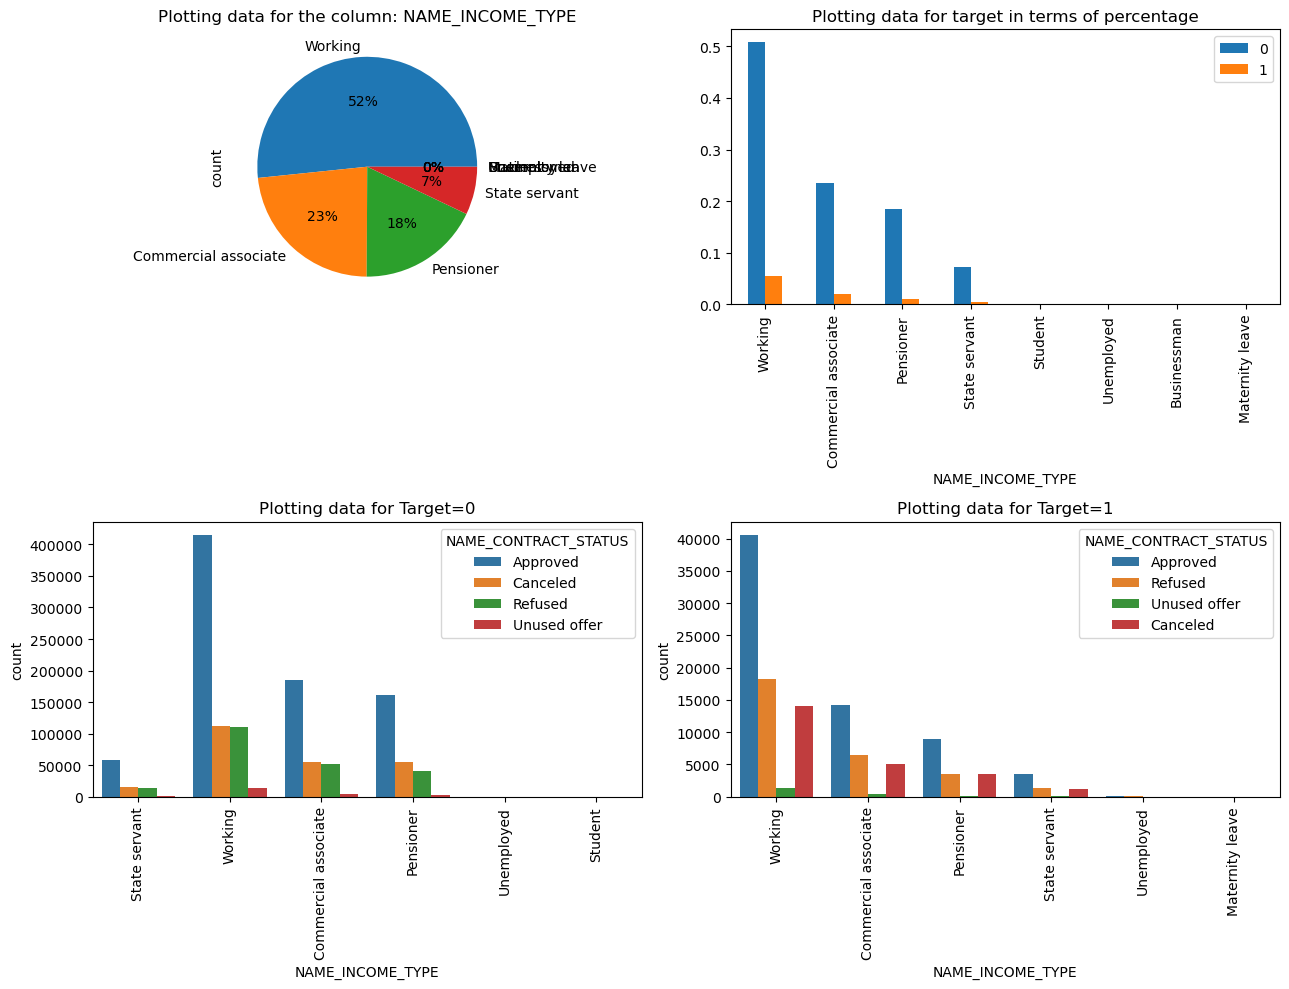

In [1124]:
plotting("NAME_INCOME_TYPE","NAME_CONTRACT_STATUS")

**AGE_GRP & NAME_CONTRACT_STATUS**

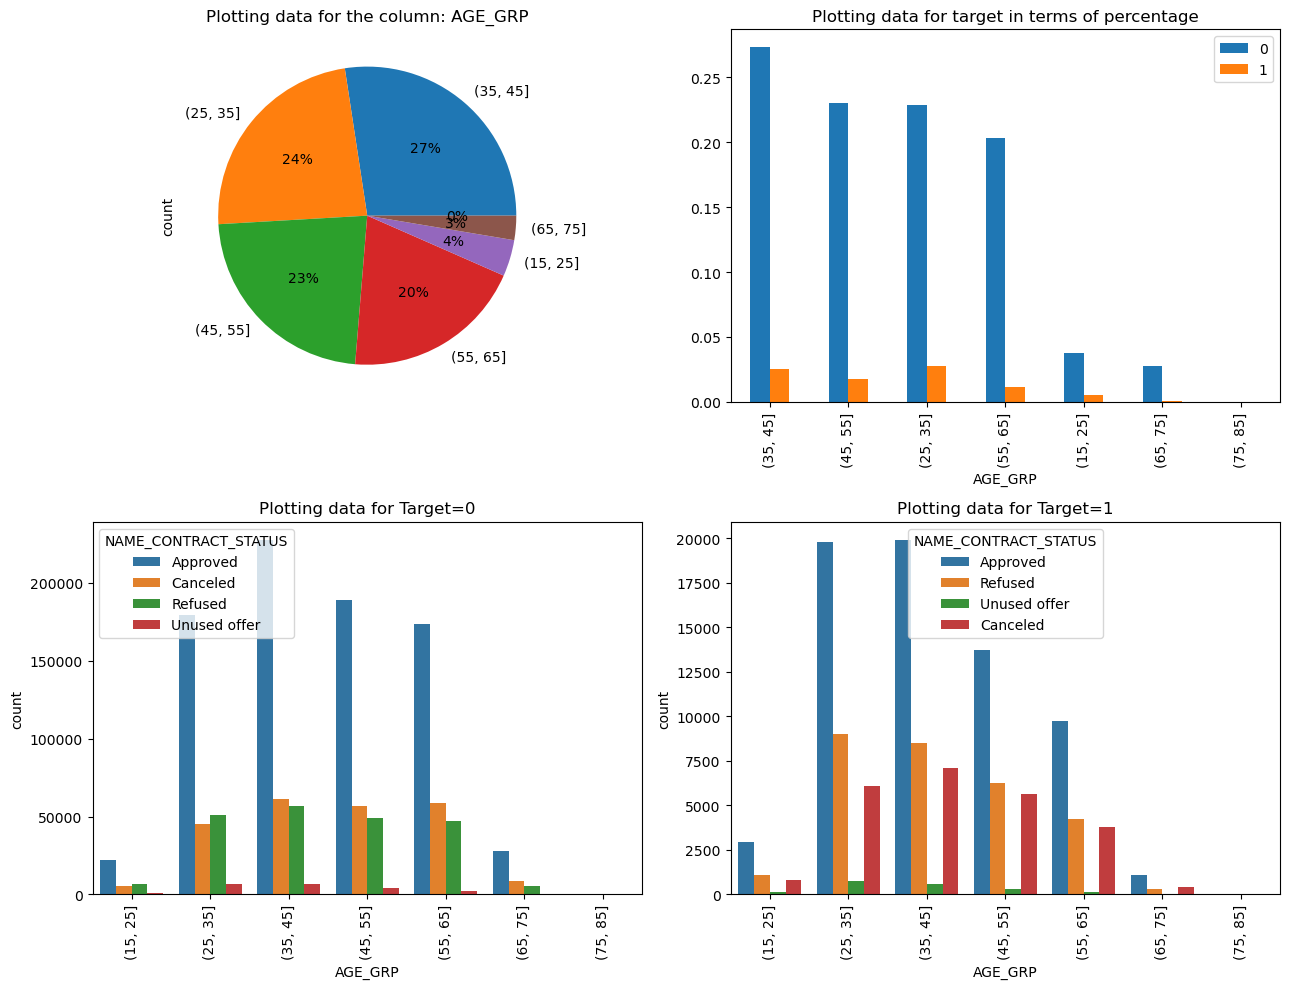

In [1125]:
plotting("AGE_GRP","NAME_CONTRACT_STATUS")

**Few points from the above plots.**

In [ ]:
Approved Loans are approximately 40000 for Female and it is more than 25000 for Male in Target 1.
Laborers and Sales staff are having maximum approved loans in default category.
Secondary educated clients seems to be have their loans approved mostly in Target 1.
Working class seems to have highest number in terms of loans approved.
Age grp 25-35 and 35-45 seems to be getting their loans approved and their number in defualting is also high.

